<h1>Análise de procedimentos hospitalares do SUS</h1>

<h2>Módulo 1</h2>

# Aula 1

## Primeiros passos

Neste documento, será feita uma análise do custo total de procedimentos hospitalares, separados por Estado e medidos mensalmente.
O primeiro passo é importar as bibliotecas necessárias.

In [1]:
import pandas as pd # Manipulação de tratamento de dados
import matplotlib.pyplot as plt # Plotagem de gráficos
import matplotlib.ticker as ticker # Formatação de dados de gráficos
import numpy as np # Biblioteca Numpy

A segunda etapa é realizar a leitura dos dados. Neste caso, usamos o dataset 'A192613189_28_143_208.csv', disponível no <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def'>Datasus</a>.

In [2]:
dados = pd.read_csv('A192613189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, engine='python', thousands='.', decimal=',')
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,...,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06,9.266015e+06,7.730597e+06,1.102331e+07,9.964113e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,...,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06,3.715723e+06,3.538428e+06,4.077046e+06,4.500485e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,...,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07,2.143029e+07,2.591713e+07,2.203218e+07,1.917248e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,...,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06,3.266928e+06,3.519774e+06,3.985530e+06,3.288770e+08
4,15 Pará,18864744.11,1.955376e+07,2.193734e+07,2.084283e+07,2.324995e+07,2.324069e+07,2.400222e+07,2.334122e+07,2.517226e+07,...,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07,3.835468e+07,3.768831e+07,3.327639e+07,4.705309e+09
5,16 Amapá,1120973.34,1.268740e+06,9.746512e+05,1.141137e+06,8.663462e+05,1.440979e+06,1.426659e+06,1.475551e+06,1.651341e+06,...,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06,2.802886e+06,2.817849e+06,3.188211e+06,3.098601e+08
6,17 Tocantins,3441592.69,4.985689e+06,6.205613e+06,4.984482e+06,5.511002e+06,4.927934e+06,5.445602e+06,5.413710e+06,5.596670e+06,...,9.155572e+06,8.390268e+06,8.729632e+06,7.770886e+06,5.278405e+05,6.752771e+05,4.195535e+05,3.191609e+05,1.357751e+06,1.020028e+09
7,21 Maranhão,10723506.39,1.355968e+07,1.398514e+07,1.480942e+07,1.450573e+07,1.490809e+07,1.578490e+07,1.519531e+07,1.495128e+07,...,3.547349e+07,3.221904e+07,3.007715e+07,3.320078e+07,3.194267e+07,3.078340e+07,3.073875e+07,3.092448e+07,3.966368e+07,3.871069e+09
8,22 Piauí,7985142.43,1.007993e+07,1.029837e+07,1.077598e+07,1.039836e+07,1.052825e+07,1.104011e+07,1.054918e+07,1.089920e+07,...,1.990857e+07,2.566354e+07,2.023078e+07,2.238922e+07,1.891160e+07,2.088397e+07,2.268939e+07,1.940027e+07,2.001833e+07,2.280889e+09
9,23 Ceará,15539821.90,2.573510e+07,2.872463e+07,3.067646e+07,3.060445e+07,3.127240e+07,3.092539e+07,2.785144e+07,3.036272e+07,...,5.601951e+07,6.171949e+07,5.662592e+07,5.907460e+07,5.691650e+07,5.084935e+07,5.207822e+07,5.317125e+07,6.207962e+07,6.591837e+09


Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format

E agora nos certificamos que a formação está correta!

In [4]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,3253399.45,2946398.44,2416019.23,2203732.04,2218532.26,2566919.60,2802886.34,2817849.31,3188210.98,309860092.59
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,9155572.36,8390267.72,8729632.49,7770885.66,527840.46,675277.05,419553.49,319160.87,1357751.33,1020028272.64
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,35473489.49,32219037.29,30077152.72,33200778.47,31942670.33,30783403.58,30738750.31,30924484.99,39663677.48,3871069498.04
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,19908573.27,25663537.49,20230782.72,22389215.72,18911604.50,20883972.79,22689390.32,19400269.01,20018325.75,2280888802.74
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,56019506.33,61719491.69,56625919.77,59074596.33,56916499.66,50849353.22,52078218.88,53171253.41,62079618.54,6591836650.18


Apenas para testes, podemos verificar a média total do dataset.

In [5]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

## Iniciando com gráficos

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro mostrará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

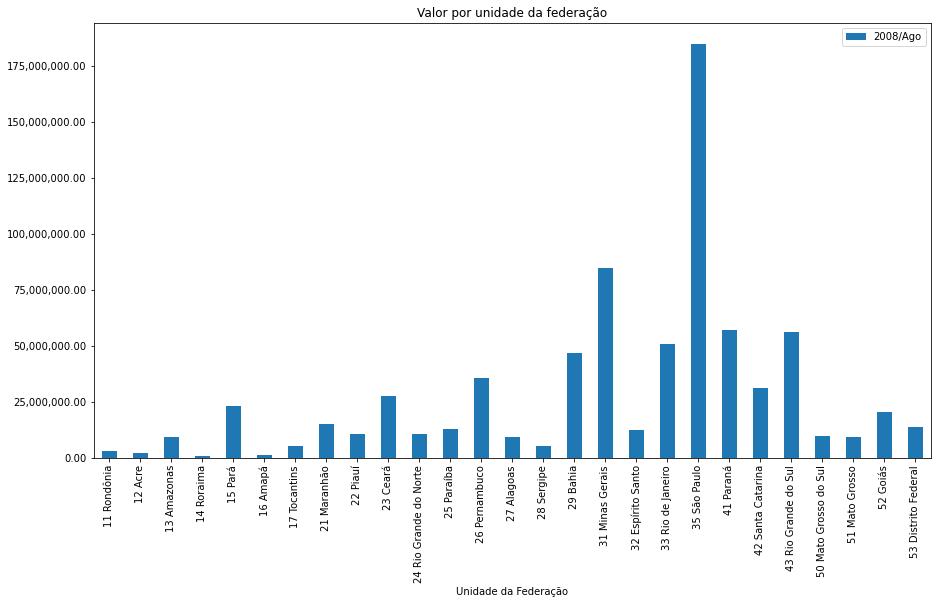

In [6]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Valor por unidade da federação')
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

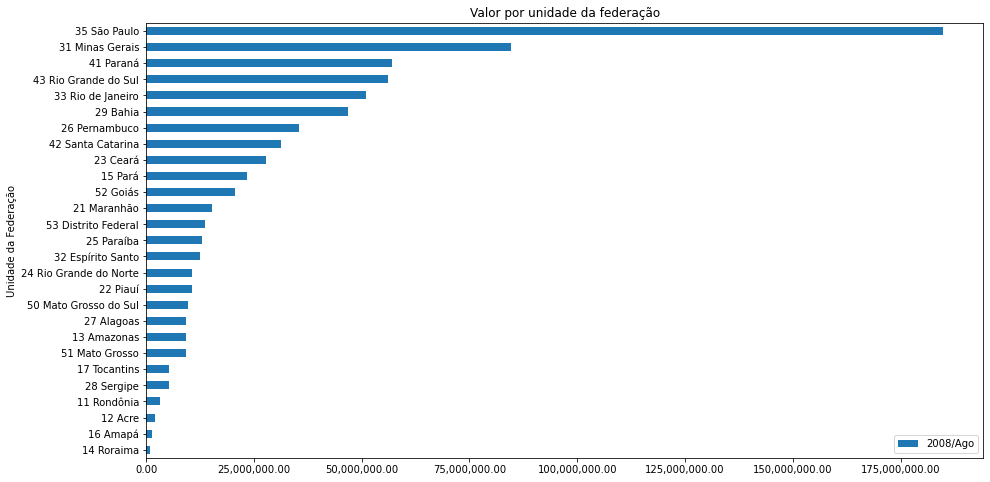

In [7]:
dados_ordenados = dados.sort_values(by='2008/Ago', ascending=False)
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

## Desafios

### 1 - Escolher um título mais descritivo

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo X (valores) divido por um milhão, para facilitar a legibilidade.

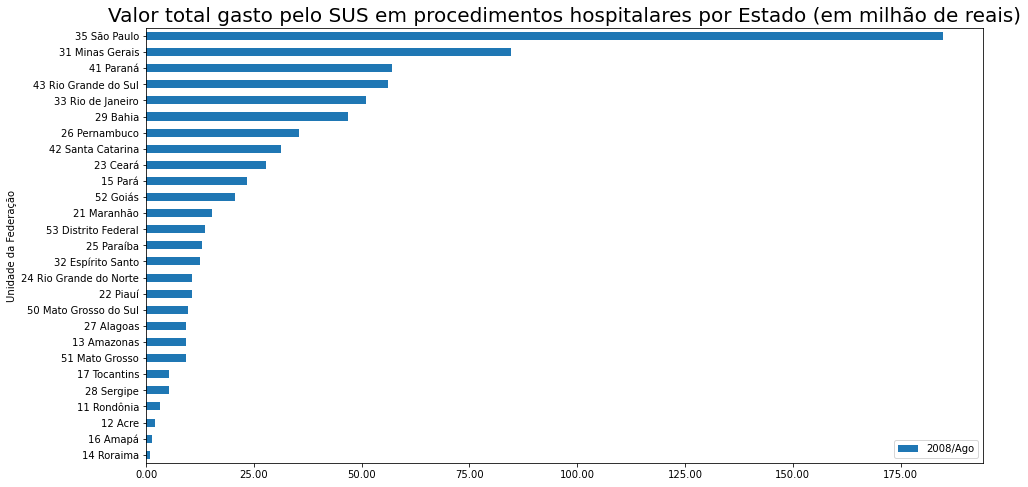

In [8]:
dados_ordenados['2008/Ago'] /= 1000000
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

### 2 - Mesma análise da aula, porém com o mês mais recente

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [9]:
dados[dados.columns[-3:]].head()

,2021/Fev,2021/Mar,Total
0,7730597.04,11023309.47,996411254.68
1,3538427.92,4077045.92,450048530.47
2,25917134.55,22032176.22,1917247936.05
3,3519773.73,3985530.08,328876965.09
4,37688314.23,33276392.89,4705309002.29


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Março de 2021. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano. Existe uma linha na coluna referente ao mês de março que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguida, plotar o gráfico.

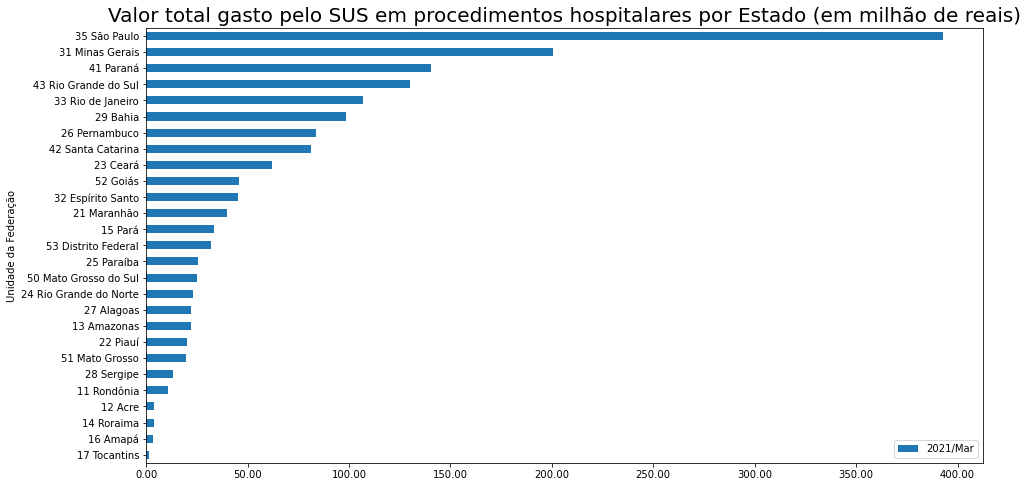

In [10]:
#dados['2021/Mar'] = dados['2021/Mar'].str.replace(r'-', '0').astype(float)
dados_mais_recentes = dados.sort_values(by='2021/Mar', ascending=False)
dados_mais_recentes['2021/Mar'] /= 1000000
ax = dados_mais_recentes.plot(x='Unidade da Federação', y='2021/Mar', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

# Aula 2

## Importando dataset de atendimentos

A partir deste ponto faremos o mesmo procedimento de import de dados realizado na aula passada, porém com um dataset de atendimentos do SUS. O dataset foi obtido por meio <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def'>deste link</a>.

In [11]:
dados_atendimentos = pd.read_csv('A224855189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, engine='python', thousands='.', decimal=',')
dados_atendimentos

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


## Fazendo slicing de dados.

É possível selecionar apenas uma parte do dataset para realizar algumas análises exploratórias. Por exemplo, podemos pegar dados de apenas duas colunas - agosto e setembro de 2008.

In [12]:
dados_atendimentos[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Podemos realizar comparações com estes dados. Por exemplo, comparar gastos entre dois ou mais estados. Mas para isso, precisaremos coletar colunar que tenham dados de gastos em todos os meses pois, como vimos acima, existem colunas que não possuem dados. Uma forma de fazer esta tarefa é tirar a média do dataset.

In [13]:
dados_atendimentos.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Note que trouxe apenas dados a partir de 2007, mesmo tendo colunas que começam em '1992/Mar'. Isso porque a função média ignora colunas que não tem dados numéricos para fazer conta. Como estamos interessados nos nomes da colunas, podemos pegar todos eles, usando o índice.

In [14]:
colunas_usaveis = dados_atendimentos.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


Agora podemos fazer um novo sclicing dos nossos dados, pegando apenas colunas que contenham dados para comparação.

In [15]:
dados_atendimentos[colunas_usaveis]

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


Quase tudo ok. O problema é que o índice do dataset está configurado com uma sequência numérica que vai do número 0 ao 26. Porém o ideal no nosso caso é que o índice seja o nome dos Estados. Podemos mudar isso.

In [16]:
dados_atendimentos = dados_atendimentos[colunas_usaveis]
dados_atendimentos = dados_atendimentos.set_index('Unidade da Federação')
dados_atendimentos


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74


Como o índice foi trocado, podemos buscar dados pelo mesmo. A instrução abaixo deve ser entendida como 'localize a linha (todos os meses e anos) cujo índice seja igual a 21 Maranhão'. 

In [17]:
dados_atendimentos.loc['21 Maranhão']

2007/Ago       385330.18
2007/Set      1018352.93
2007/Out      2277717.78
2007/Nov      4334468.23
2007/Dez      8832514.85
                ...     
2020/Dez     30927070.93
2021/Jan     26797697.76
2021/Fev     23260245.95
2021/Mar     17294509.11
Total      3871069498.04
Name: 21 Maranhão, Length: 165, dtype: float64

## Plotando gráficos

Vamos plotar um gráfico do nosso dataset da forma mais simples possível.

<AxesSubplot:xlabel='Unidade da Federação'>

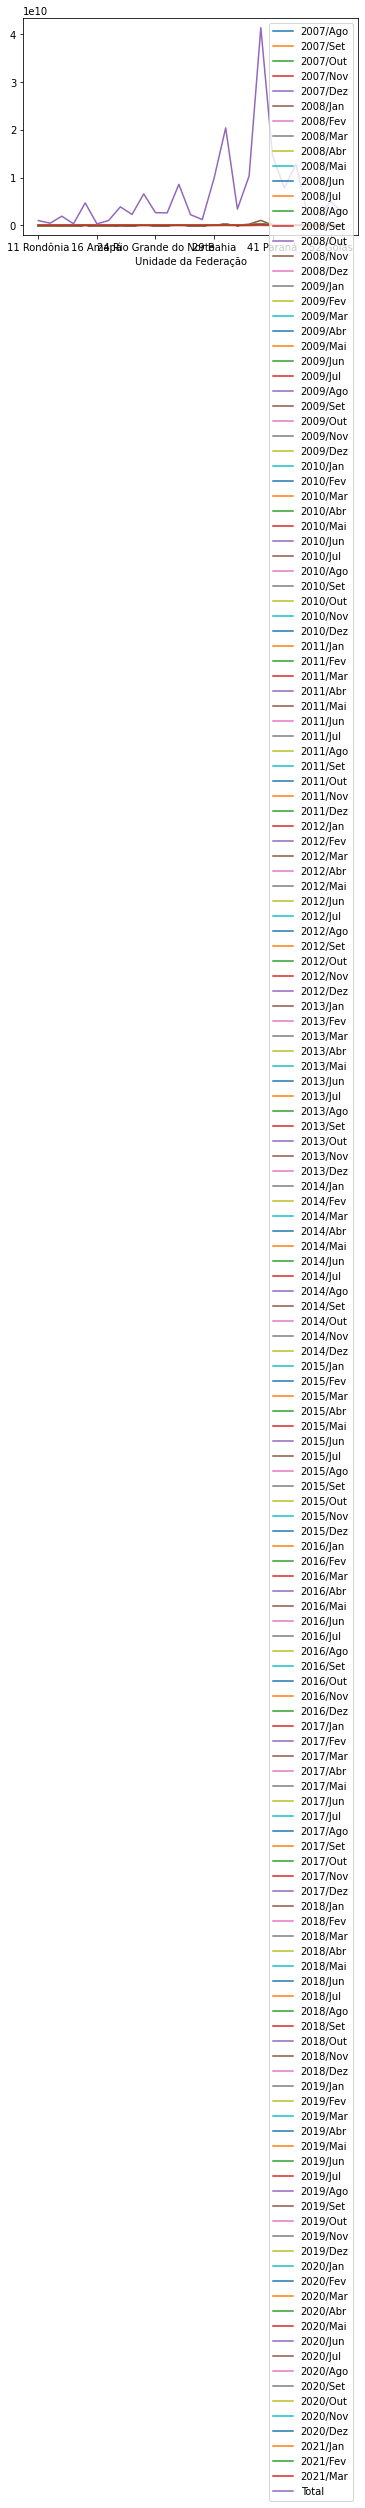

In [18]:
dados_atendimentos.plot()

Aconteceu um efeito indesejado. Ficou bem estranho! Ele entendeu que cada mês e ano são as linhas do gráfico, enquanto os Estados são as colunas. Por que isso aconteceu? Vamos observar o dataset novamente.

In [19]:
dados_atendimentos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


O plot está pegando os dados das colunas e formando as linhas. O ideal é que os Estados fossem as colunas do nosso dataset, enquanto que os meses e anos fossem as linhas. Em outras palavras, precisamos rotacionar o nosso dataset. Isso é feito da seguinte forma:

In [20]:
dados_atendimentos.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


Isso torna-se possível usando o 'T'. Vamos plotar novamente.

<AxesSubplot:>

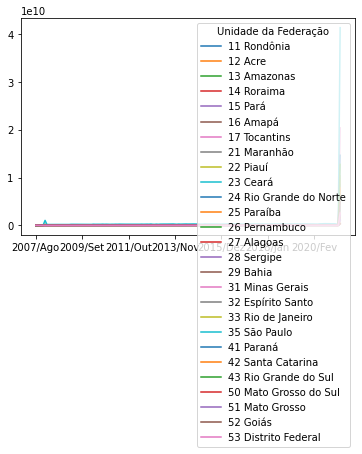

In [21]:
dados_atendimentos.T.plot()

O gráfico tem muitas linhas, porém passa a fazer mais sentido. A tarefa agora é 'fatiar' os dados para plotar somente aquilo que for de interesse na exploração de dados. Mesmo assim, podemos observar que na parte direita do gráfico os valores estão enormes. Isso é porque existe uma coluna totalizando os gastos dos Estados, prejudicando a exploração e legibilidade dos dados.

In [22]:
dados_atendimentos.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12764391179.92
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77,2324525096.33
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09,2180119781.15
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,...,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02,4973572261.43
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43,2592422853.56


Precisamos remover esta coluna. Para não prejudicar o dataset original, vamos criar uma cópia dele sem a coluna total.

In [23]:
dados_atendimentos_sem_total = dados_atendimentos.drop('Total', axis=1)
dados_atendimentos_sem_total

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,35894441.09,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53


Agora sim podemos plotar novamente.

<AxesSubplot:>

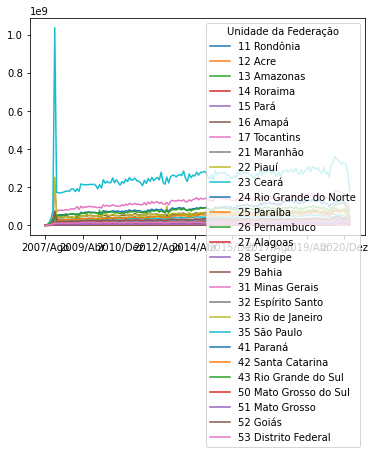

In [24]:
dados_atendimentos_sem_total.T.plot()

O gráfico agora faz um pouco mais de sentido, mas ainda carece de ajustes.

## Desafios

### 1- Posicionar a legenda do gráfico de forma mais adequada

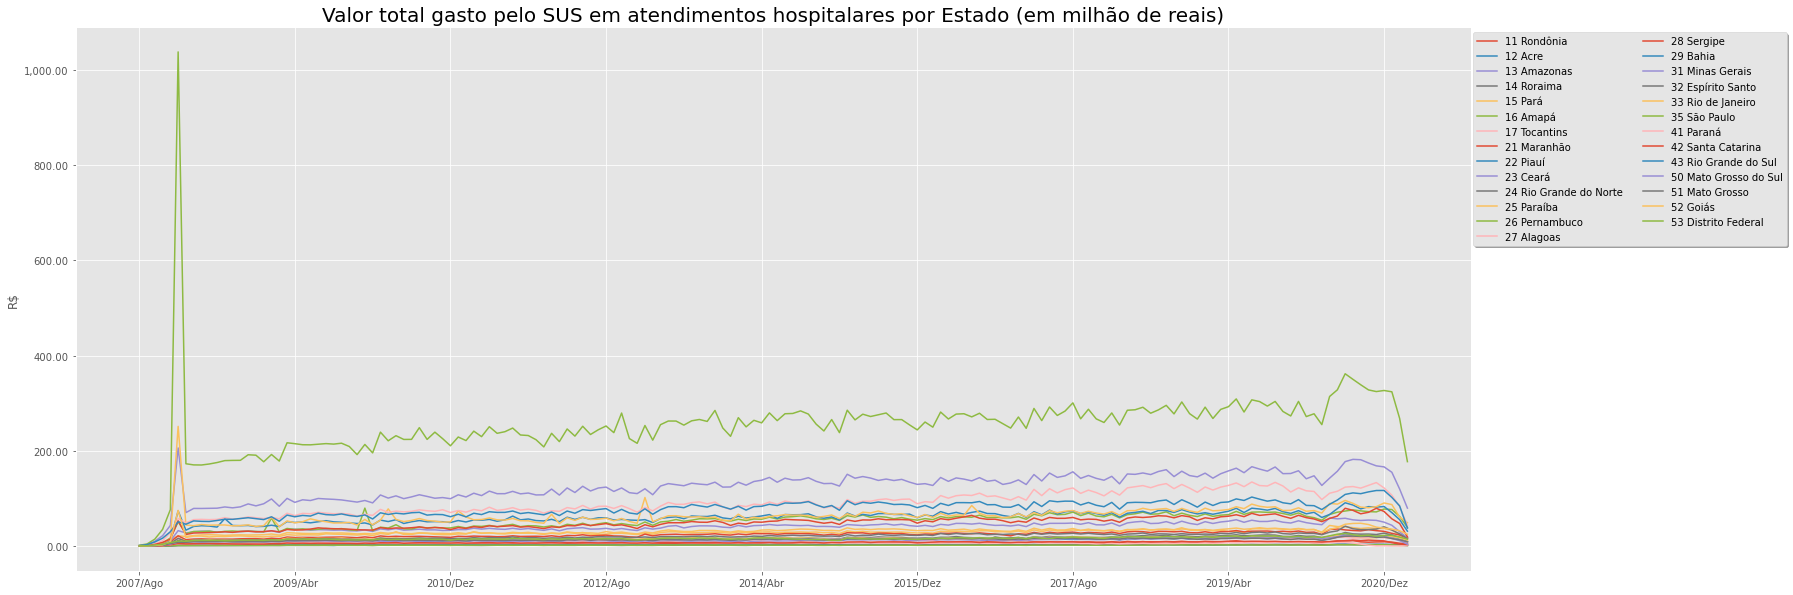

In [25]:
dados_atendimentos_sem_total_plot = dados_atendimentos_sem_total.div(1000000)
plt.style.use('ggplot')
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel('R$')
plt.title('Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

### 2 - Plotar o gráfico de linha com apenas 5 estados de sua preferência

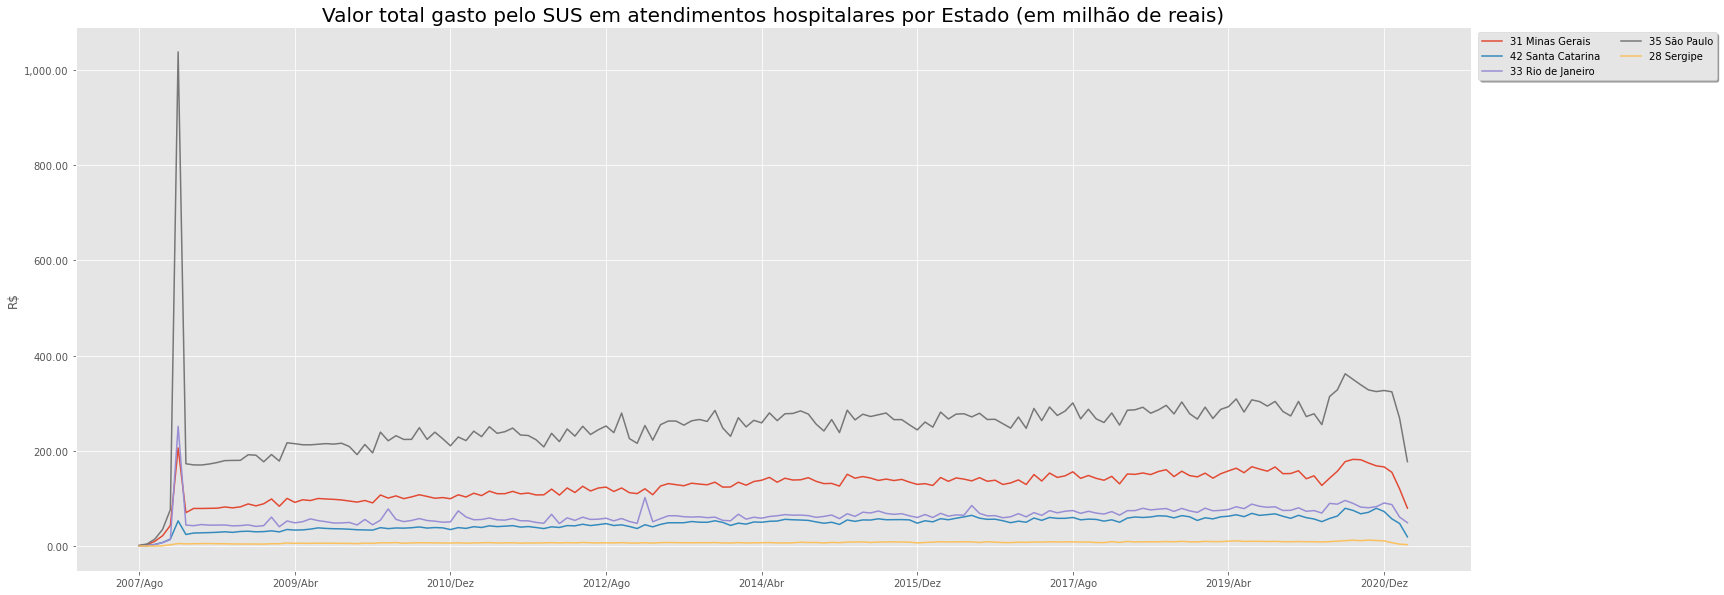

In [26]:
plt.style.use('ggplot')
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

# Aula 3

## Outras técnicas de slicing de dados

Podemos pegar uma fatia dos dados por meio de algum critério de seleção. O primeiro que veremos é seleção por posição em um array. A instrução abaixo signifca pegar os seis primeiros dados, ou seja, de zero (primeiro elemento) até seis (último elemento). O número 7 foi colocado por se tratar de um 'exclusive', ou seja, 'pegue os dados de zero até seis, mas não o sete'.

In [27]:
dados_atendimentos_sem_total[:7]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84


Uma outra forma possível é usando aleatoriedade. No exemplo abaixo, vamos solicitar aleatoriamente os dados de 8 estados.

In [28]:
dados_atendimentos_sem_total.sample(n=8)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,...,38888207.13,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,57225862.97,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55


Se  rodarmos de novo a mesma instrução, veremos resultados diferentes.

In [29]:
dados_atendimentos_sem_total.sample(n=8)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,57225862.97,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,...,10458350.95,11700344.16,12434101.29,11488626.57,12571979.79,11816872.93,10997949.03,7149727.62,4129845.36,3081081.42


Caso seja desejável (por exemplo, em cenários onde a reprodutibilidade do estudo seja um requisito) podemos configurar uma semente para o gerados de números aleatórios.

In [30]:
np.random.seed(547821)
dados_atendimentos_sem_total.sample(n=8)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
27 Alagoas,104243.75,174024.90,595544.54,1125396.73,2564966.65,16568724.64,8112220.30,9210505.56,10466691.94,9844096.03,...,18400380.22,18519350.73,16706034.11,17201473.11,18109194.42,18857578.34,17462663.52,16496784.27,12792571.64,8180887.21
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,...,10458350.95,11700344.16,12434101.29,11488626.57,12571979.79,11816872.93,10997949.03,7149727.62,4129845.36,3081081.42
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80


Se rodarmos de novo com a mesma semente...

In [31]:
np.random.seed(547821)
dados_atendimentos_sem_total.sample(n=8)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
27 Alagoas,104243.75,174024.90,595544.54,1125396.73,2564966.65,16568724.64,8112220.30,9210505.56,10466691.94,9844096.03,...,18400380.22,18519350.73,16706034.11,17201473.11,18109194.42,18857578.34,17462663.52,16496784.27,12792571.64,8180887.21
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,...,10458350.95,11700344.16,12434101.29,11488626.57,12571979.79,11816872.93,10997949.03,7149727.62,4129845.36,3081081.42
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80


... Vamos obter o mesmo resultado. E podemos plotar o gráfico

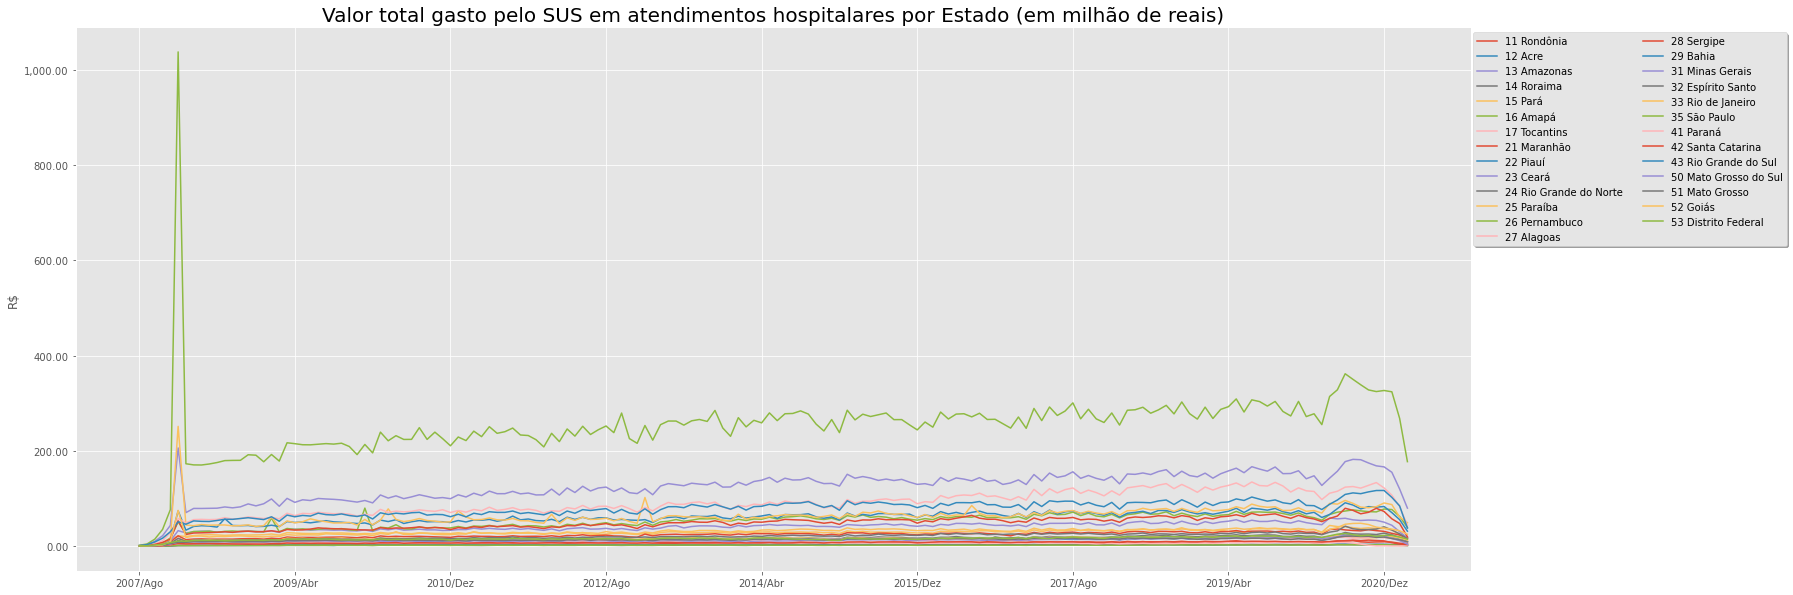

In [32]:
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Existe um pico de valores no começo do gráfico que, a princípio, não sabemos o motivo. Além disso, não há clareza quanto às informações das linhas. Esta linha em vermelho em destaque se refere aos gastos do Estado de São Paulo ou Paraíba? Não tem como saber, pois o ggplot alocou a mesma cor para ambos os Estados! o_O

## Desafios

### 1 - Escolher uma palete de cores mais adequada do matplotlib

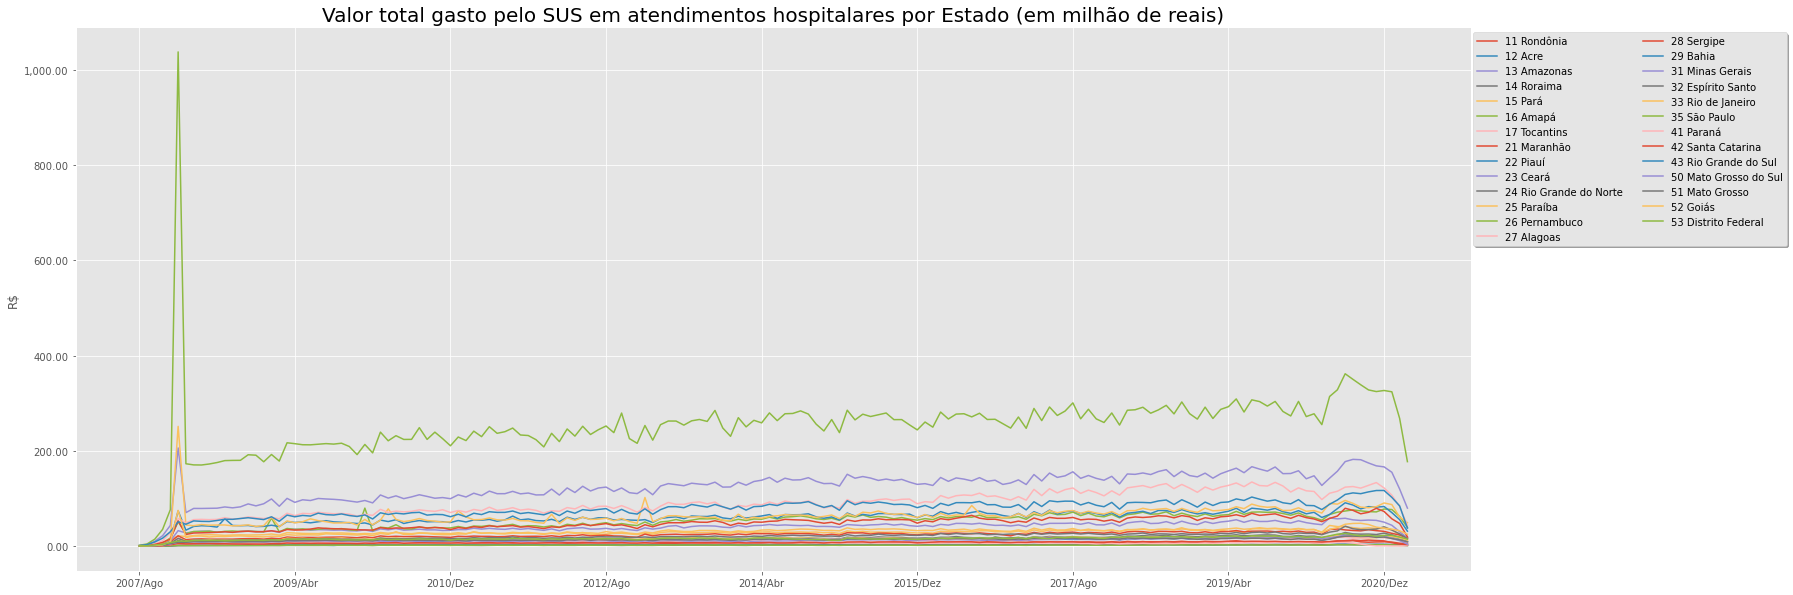

In [33]:
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

### 2 - Adicionar uma coluna mostrando a região

In [34]:
def preenche_regioes(valor):
    switcher = {
        '1': 'Norte',
        '2': 'Nordeste',
        '3': 'Sudeste',
        '4': 'Sul',
        '5': 'Centro-Oeste'
    }
    return switcher.get(valor, 'Região do país inválida!')

for index, row in dados_atendimentos_sem_total_plot.iterrows():
    regiao = preenche_regioes(index[:1])
    dados_atendimentos_sem_total_plot.loc[index, 'Região']  = regiao

dados_atendimentos_sem_total_plot

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0.00,0.02,0.13,0.35,0.71,1.83,1.94,1.96,2.14,2.28,...,10.48,11.43,8.88,8.17,8.76,9.00,8.41,6.04,4.73,Norte
12 Acre,0.01,0.01,0.09,0.30,0.77,1.73,1.74,2.06,2.06,2.23,...,4.05,3.66,3.47,3.27,3.39,3.71,3.01,2.27,1.14,Norte
13 Amazonas,0.04,0.05,0.42,2.02,5.95,11.42,7.93,8.64,8.53,9.08,...,19.30,18.69,18.63,18.73,20.45,21.55,24.44,13.68,6.80,Norte
14 Roraima,0.00,0.01,0.04,0.37,0.47,0.81,0.77,0.88,0.90,1.03,...,3.19,3.26,2.98,3.31,3.53,3.13,3.21,3.04,2.38,Norte
15 Pará,0.18,0.43,1.89,5.11,13.16,21.76,20.13,22.15,23.44,23.86,...,40.50,38.79,36.97,38.41,37.04,36.91,33.89,23.34,13.07,Norte
16 Amapá,0.03,0.10,0.12,0.23,0.84,1.33,1.28,1.18,1.40,1.41,...,2.54,2.70,2.53,2.76,2.71,2.83,2.51,1.53,0.99,Norte
17 Tocantins,0.00,0.08,0.34,1.07,3.02,5.14,5.05,5.20,5.34,5.34,...,7.93,6.49,4.23,1.85,0.51,0.69,0.35,0.42,0.93,Norte
21 Maranhão,0.39,1.02,2.28,4.33,8.83,21.55,13.45,14.75,15.15,14.54,...,33.99,32.71,31.99,34.43,32.45,30.93,26.80,23.26,17.29,Nordeste
22 Piauí,0.22,0.35,1.08,2.41,4.93,11.38,9.71,10.43,10.23,10.56,...,25.82,22.45,20.64,20.33,20.02,19.35,18.44,13.64,9.54,Nordeste


### 3 - Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável 

Como esta tarefa já foi feita anteriormente, vamos reproduzir aqui, com alguns ajustes.

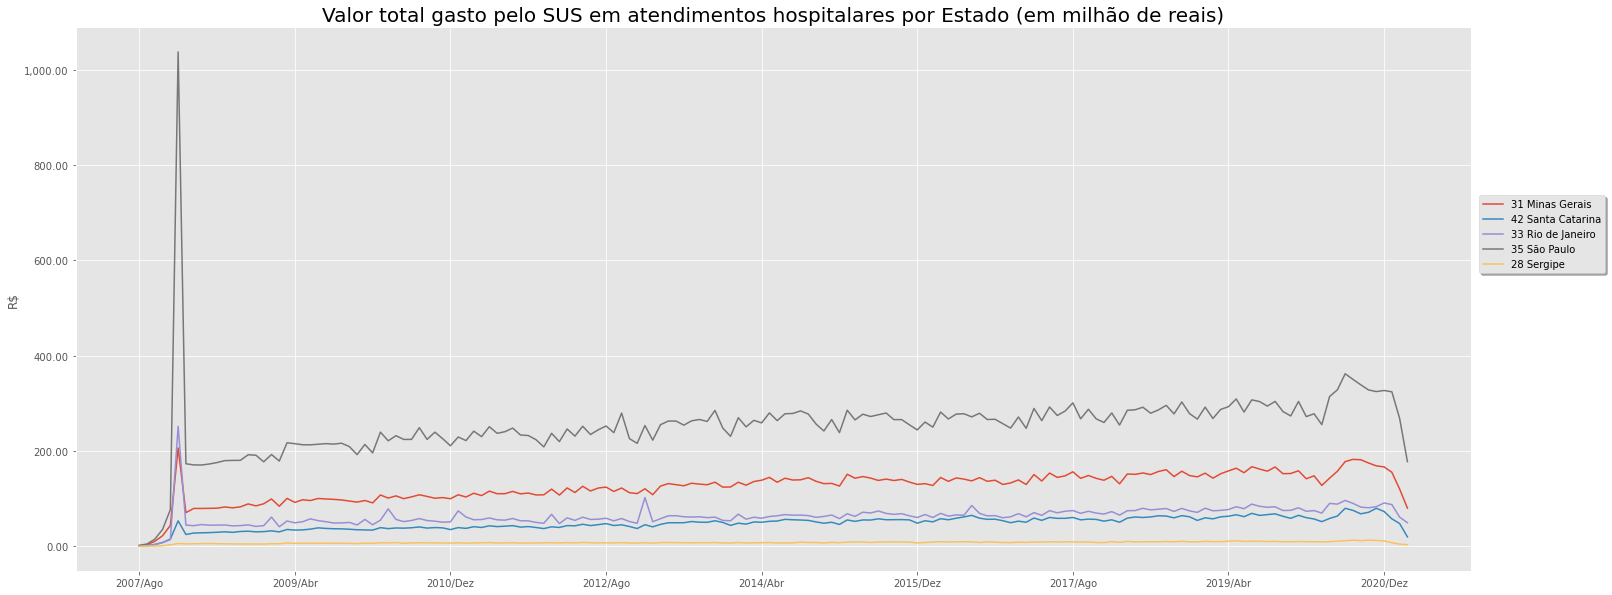

In [35]:
colors = plt.cm.jet(np.linspace(0,1,5))
ax = dados_atendimentos_sem_total_plot.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

### 4 - Adicione o seu estado aos 5 estados plotados anteriormente

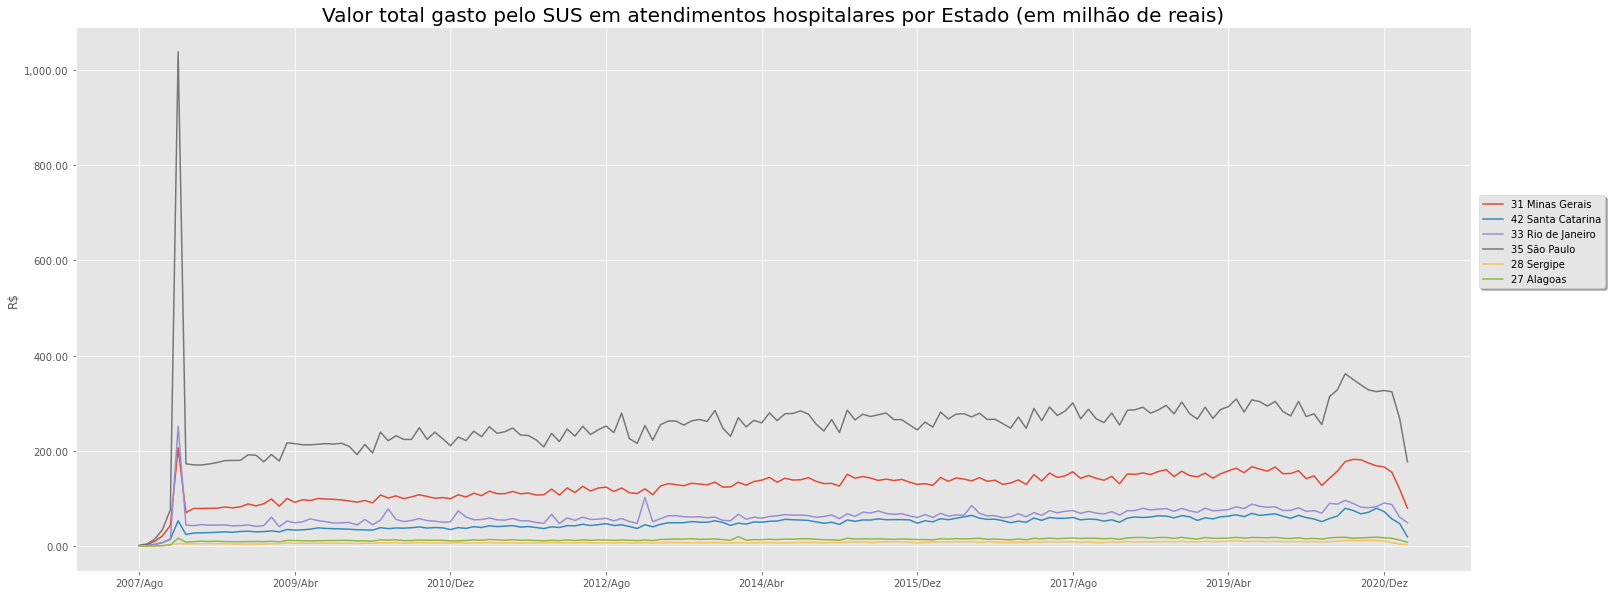

In [36]:
colors = plt.cm.jet(np.linspace(0,1,6))
ax = dados_atendimentos_sem_total_plot.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Ainda há valores muito grandes no começo do gráfico, referentes ao mês de janeiro de 2008. Para este exercício, vamos considerar os dados de fevereiro de 2008 em diante.

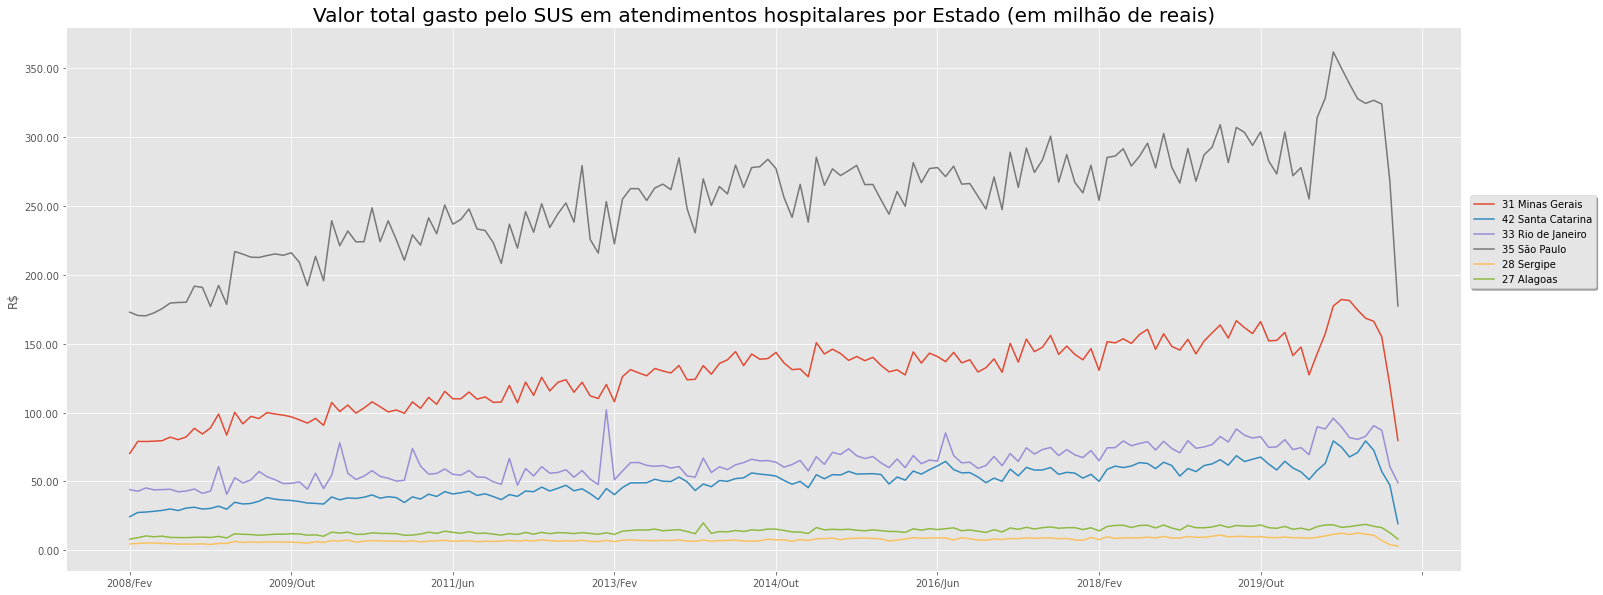

In [37]:
colors = plt.cm.jet(np.linspace(0,1,6))
colunas_de_interesse = dados_atendimentos_sem_total_plot.columns[6:]
dados_atendimentos_sem_total_plot = dados_atendimentos_sem_total_plot[colunas_de_interesse]
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

### 5 - Buscar os casos de dengue no Brasil e se os picos coincidem

No gráfico acima, podemos ver que existem alguns picos no Rio de Janeiro, sobretudo um perto de "2013/Fev". Soube-se por meio da imprensa que o Estado do Rio de Janeiro enfrentou um surto de dengue no referido ano. Para verificar se o surto coincide com os gastos hospitalares, recorri ao <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/denguebr.def'>Tabnet Datasus</a> e pesquisei por notificações de casos prováveis de dengue por mês, filtrando por primeiros sintomas.

Inicialmente vamos importar os dados.

In [38]:
dados_dengue_RJ = pd.read_csv('A001752189_28_143_208.csv', encoding='ISO-8859-1', skiprows=4, sep=';', skipfooter=17, thousands='.', decimal=',', engine='python')
dados_dengue_RJ= dados_dengue_RJ.set_index("Mês 1º Sintoma(s)")
dados_dengue_RJ

,Casos_Prováveis
Mês 1º Sintoma(s),
Janeiro,16373
Fevereiro,34033
Marco,72286
Abril,58190
Maio,17934
Junho,4613
Julho,1471
Agosto,693
Setembro,518


Vamos plotar um gráfico simples deste dataset.

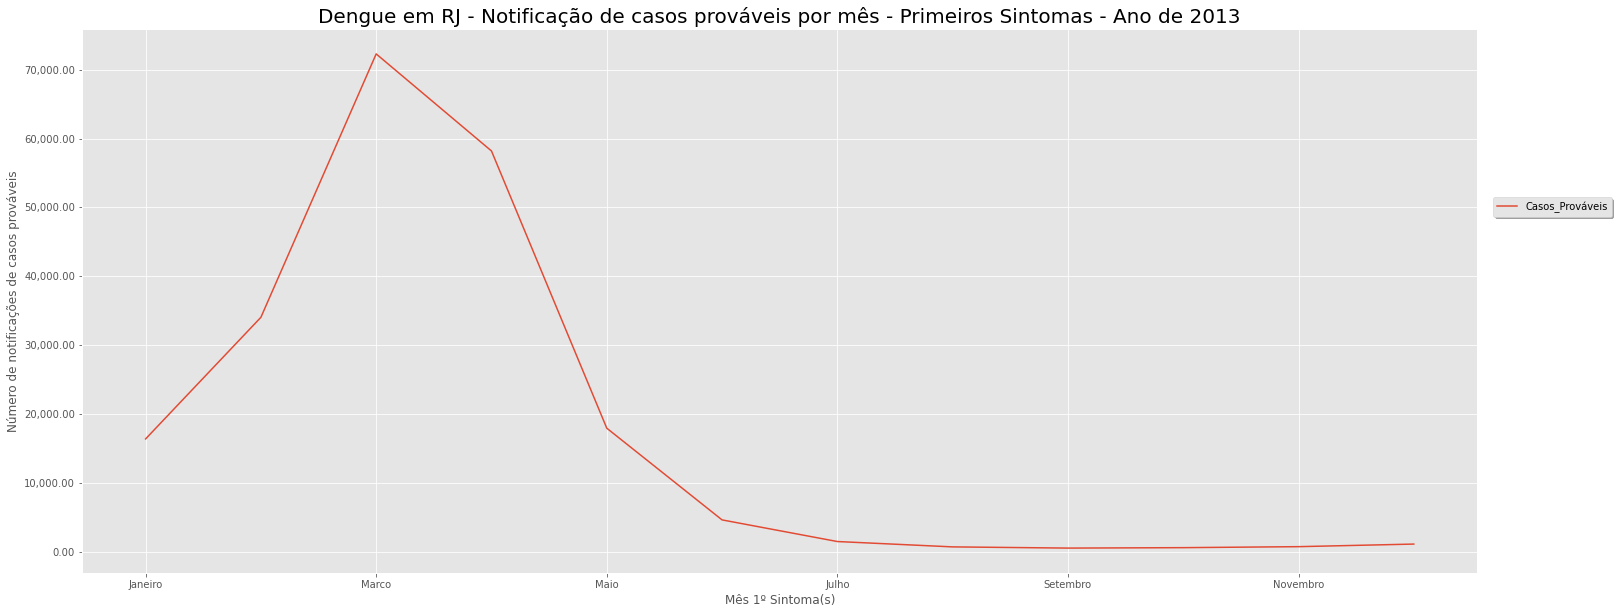

In [39]:
ax = dados_dengue_RJ.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("Número de notificações de casos prováveis")
plt.title(label = "Dengue em RJ - Notificação de casos prováveis por mês - Primeiros Sintomas - Ano de 2013", fontsize=20)
plt.show()

Ao plotar o gráfico dos estados, mas contendo apenas o Estado do Rio de Janeiro...

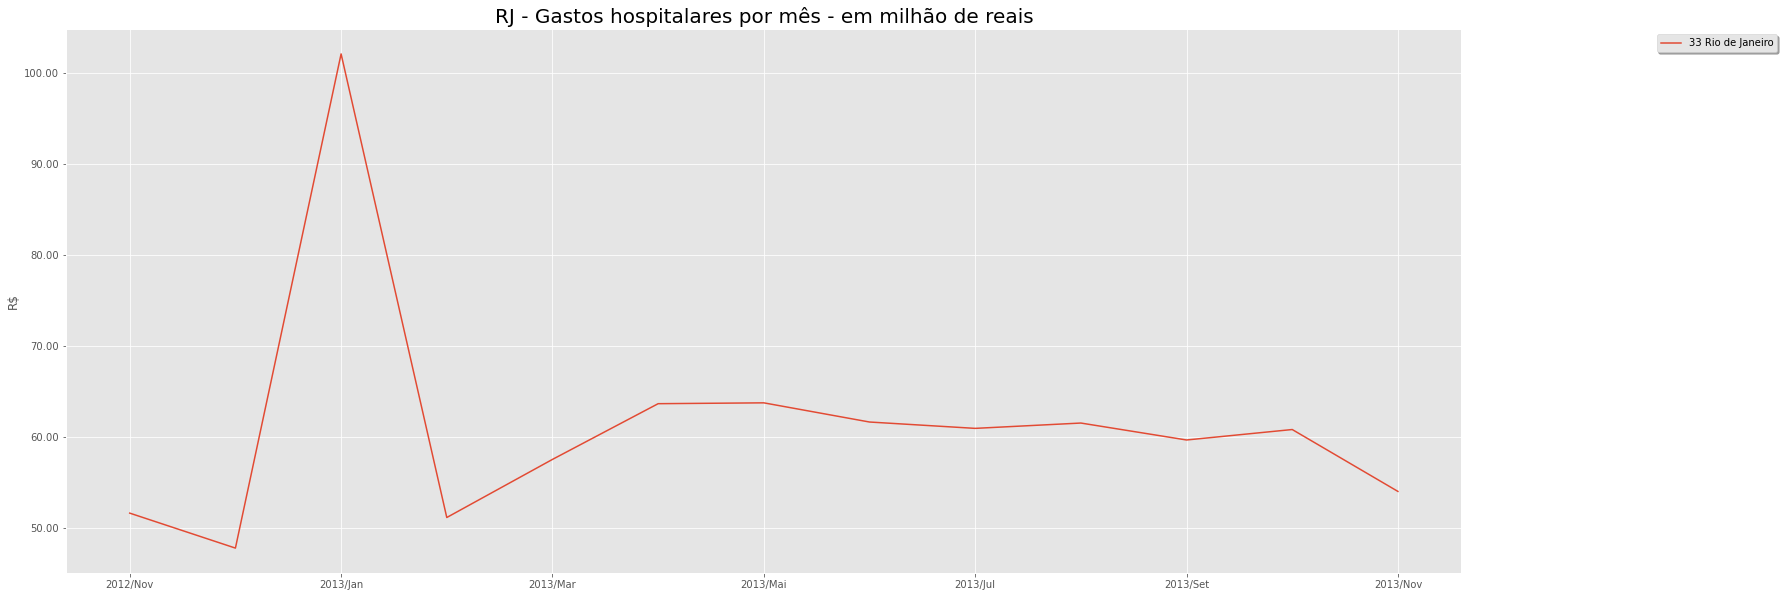

In [40]:
gastos_hospitalares_RJ = dados_atendimentos_sem_total_plot.iloc[[18]]
gastos_hospitalares_RJ = gastos_hospitalares_RJ[["2012/Nov","2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr","2013/Mai","2013/Jun","2013/Jul","2013/Ago","2013/Set","2013/Out","2013/Nov","2013/Dez"]]
ax = gastos_hospitalares_RJ.iloc[:, :-1].T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "RJ - Gastos hospitalares por mês - em milhão de reais", fontsize=20)
plt.show()

... notamos que há uma coincidência entre o aumento de gastos hospitalares e a notificação de casos prováveis de dengue no período.

### 6 - Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

Primeiro, vamos criar um dataset a partir do nosso de estudo, porém contendo apenas os estados da região Sudeste.

In [41]:
dados_atendimentos_sem_total_plot_sudeste = dados_atendimentos_sem_total_plot.loc[dados_atendimentos_sem_total_plot['Região'] == 'Sudeste']
dados_atendimentos_sem_total_plot_sudeste = dados_atendimentos_sem_total_plot_sudeste.iloc[: , :-1]
dados_atendimentos_sem_total_plot_sudeste

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
32 Espírito Santo,10.03,12.26,12.45,11.79,11.89,12.21,12.38,12.49,12.85,12.89,...,31.96,41.93,36.41,34.49,34.80,35.71,40.50,33.77,25.67,15.61
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41


Agora vamos plotar um gráfico para o mesmo período da pesquisa no Datasus.

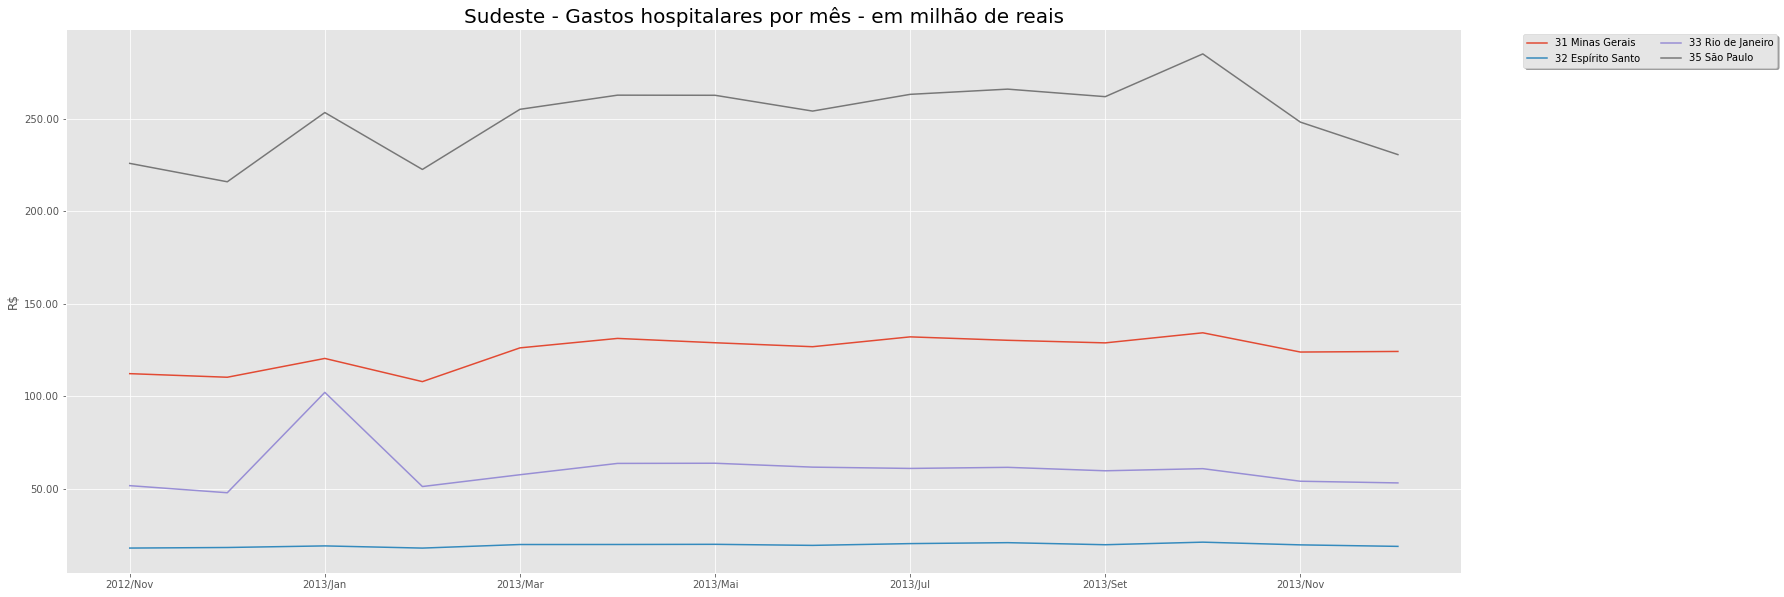

In [42]:
colors = plt.cm.jet(np.linspace(0,1,4))
dados_atendimentos_sem_total_plot_sudeste = dados_atendimentos_sem_total_plot_sudeste[["2012/Nov","2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr","2013/Mai","2013/Jun","2013/Jul","2013/Ago","2013/Set","2013/Out","2013/Nov","2013/Dez"]]
ax = dados_atendimentos_sem_total_plot_sudeste.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Sudeste - Gastos hospitalares por mês - em milhão de reais", fontsize=20)
plt.show()

Vamos importar outro dataset, contendo agora os dados da região Sudeste.

In [43]:
dados_dengue_sudeste = pd.read_csv('A004035189_28_143_208.csv', encoding='ISO-8859-1', skiprows=4, sep=';', skipfooter=17, thousands='.', decimal=',', engine='python')
dados_dengue_sudeste = dados_dengue_sudeste.set_index("Mês 1º Sintoma(s)")
dados_dengue_sudeste = dados_dengue_sudeste.iloc[1:] # A primeira linha do dataset vem em branco. Necessário remover a mesma
#dados_dengue_sudeste = dados_dengue_sudeste.set_index("Mês 1º Sintoma(s)")
dados_dengue_sudeste["ES"] = pd.to_numeric(dados_dengue_sudeste["ES"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste["SP"] = pd.to_numeric(dados_dengue_sudeste["SP"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste["RJ"] = pd.to_numeric(dados_dengue_sudeste["RJ"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste

,MG,ES,RJ,SP,Total
Mês 1º Sintoma(s),,,,,
Janeiro,35474,6759,16373,12947,71553
Fevereiro,62419,10391,34033,30168,137011
Marco,147272,16755,72286,72678,308991
Abril,124495,13747,58190,65750,262182
Maio,31371,8742,17934,25064,83111
Junho,7222,3937,4613,5547,21319
Julho,1627,2014,1471,1316,6428
Agosto,658,1170,693,571,3092
Setembro,615,839,518,440,2412


E agora vamos plotar o gráfico.

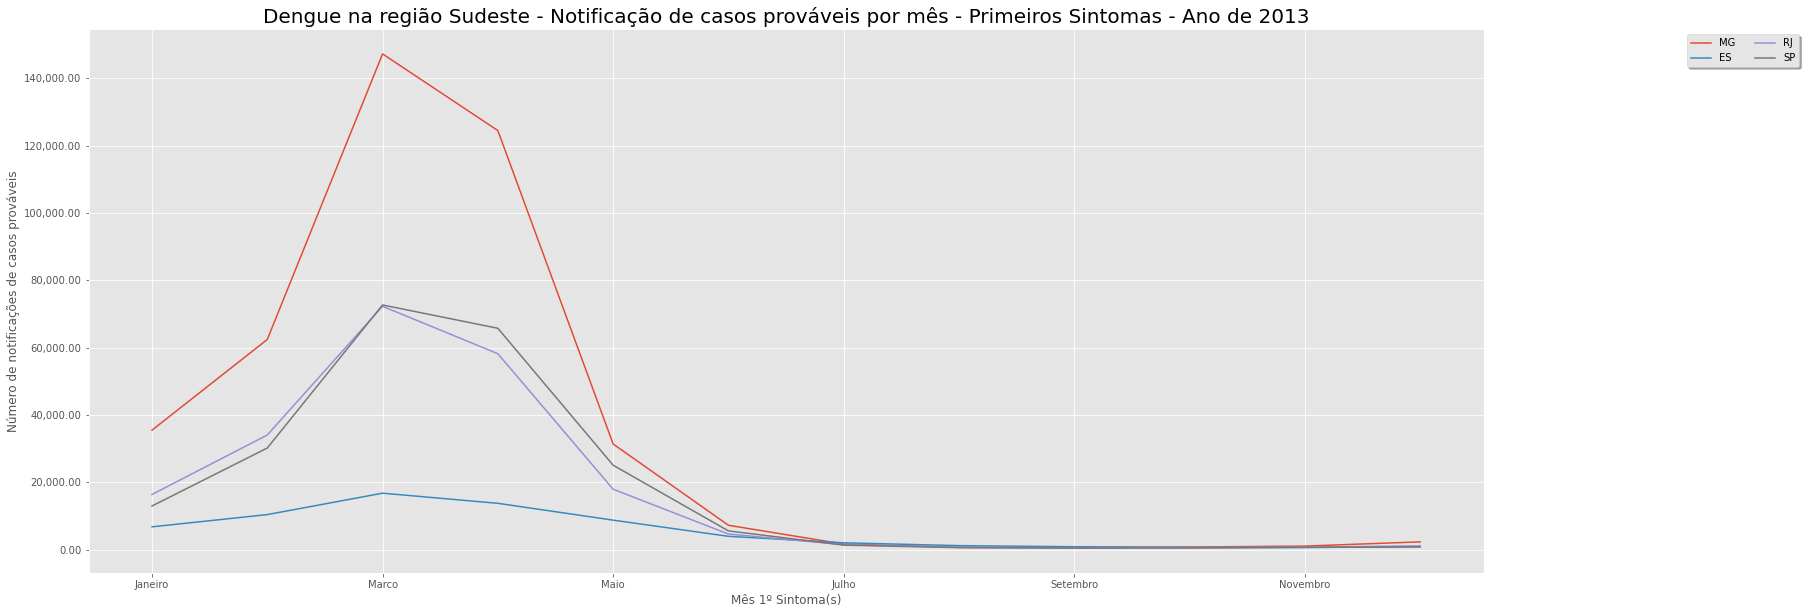

In [44]:
colors = plt.cm.jet(np.linspace(0,1,4))
ax = dados_dengue_sudeste.iloc[: , :-1].plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("Número de notificações de casos prováveis")
plt.title(label = "Dengue na região Sudeste - Notificação de casos prováveis por mês - Primeiros Sintomas - Ano de 2013", fontsize=20)
plt.show()

É possível verificar que as curvas de notificações de dengue estão bem próximas às curvas de gastos hospitalares para  região Sudeste.

### 7 - Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais

Vamos pegar os Estados do Sudeste mais Alagoas.

In [45]:
dados_atendimentos_sem_total_plot_sudeste_alagoas = dados_atendimentos_sem_total_plot.iloc[[13,16,17,18,19]]
dados_atendimentos_sem_total_plot_sudeste_alagoas = dados_atendimentos_sem_total_plot_sudeste_alagoas.iloc[: , :-1]
dados_atendimentos_sem_total_plot_sudeste_alagoas

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
27 Alagoas,8.11,9.21,10.47,9.84,10.30,9.39,9.26,9.23,9.46,9.58,...,18.40,18.52,16.71,17.20,18.11,18.86,17.46,16.50,12.79,8.18
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,...,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
32 Espírito Santo,10.03,12.26,12.45,11.79,11.89,12.21,12.38,12.49,12.85,12.89,...,31.96,41.93,36.41,34.49,34.80,35.71,40.50,33.77,25.67,15.61
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,...,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,...,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41


Vamos plotar o gráfico de gastos, agora contendo o Estado de Alagoas.

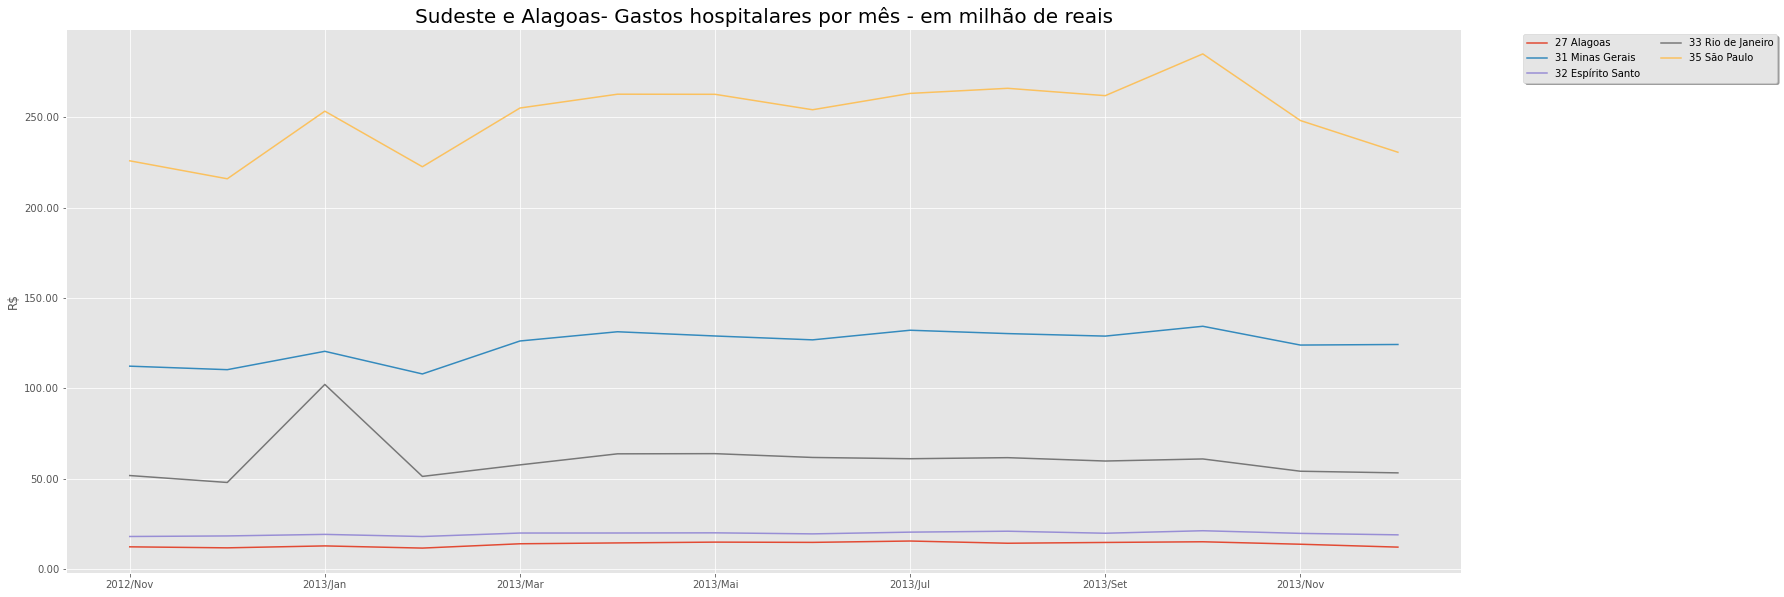

In [46]:
colors = plt.cm.jet(np.linspace(0,1,5))
dados_atendimentos_sem_total_plot_sudeste_alagoas = dados_atendimentos_sem_total_plot_sudeste_alagoas[["2012/Nov","2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr","2013/Mai","2013/Jun","2013/Jul","2013/Ago","2013/Set","2013/Out","2013/Nov","2013/Dez"]]
ax = dados_atendimentos_sem_total_plot_sudeste_alagoas.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Sudeste e Alagoas- Gastos hospitalares por mês - em milhão de reais", fontsize=20)
plt.show()

Vamos recorrer novamente ao Datasus para incluir o Estado de Alagoas em um novo dataset.

In [47]:
dados_dengue_sudeste_alagoas = pd.read_csv('A010611189_28_143_208.csv', encoding='ISO-8859-1', skiprows=4, sep=';', skipfooter=17, thousands='.', decimal=',', engine='python')
dados_dengue_sudeste_alagoas = dados_dengue_sudeste_alagoas.set_index("Mês 1º Sintoma(s)")
dados_dengue_sudeste_alagoas = dados_dengue_sudeste_alagoas.iloc[1:] # A primeira linha do dataset vem em branco. Necessário remover a mesma
#dados_dengue_sudeste = dados_dengue_sudeste.set_index("Mês 1º Sintoma(s)")
dados_dengue_sudeste_alagoas["ES"] = pd.to_numeric(dados_dengue_sudeste_alagoas["ES"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste_alagoas["SP"] = pd.to_numeric(dados_dengue_sudeste_alagoas["SP"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste_alagoas["RJ"] = pd.to_numeric(dados_dengue_sudeste_alagoas["RJ"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste_alagoas["AL"] = pd.to_numeric(dados_dengue_sudeste_alagoas["AL"]) # Para reconhecer o valor das linhas como número, senão não plota o gráfico.
dados_dengue_sudeste_alagoas

,AL,MG,ES,RJ,SP,Total
Mês 1º Sintoma(s),,,,,,
Janeiro,258,35474,6759,16373,12947,71811
Fevereiro,354,62419,10391,34033,30168,137365
Marco,618,147272,16755,72286,72678,309609
Abril,954,124495,13747,58190,65750,263136
Maio,2200,31371,8742,17934,25064,85311
Junho,1658,7222,3937,4613,5547,22977
Julho,993,1627,2014,1471,1316,7421
Agosto,822,658,1170,693,571,3914
Setembro,815,615,839,518,440,3227


Abaixo, plotaremos o gráfico.

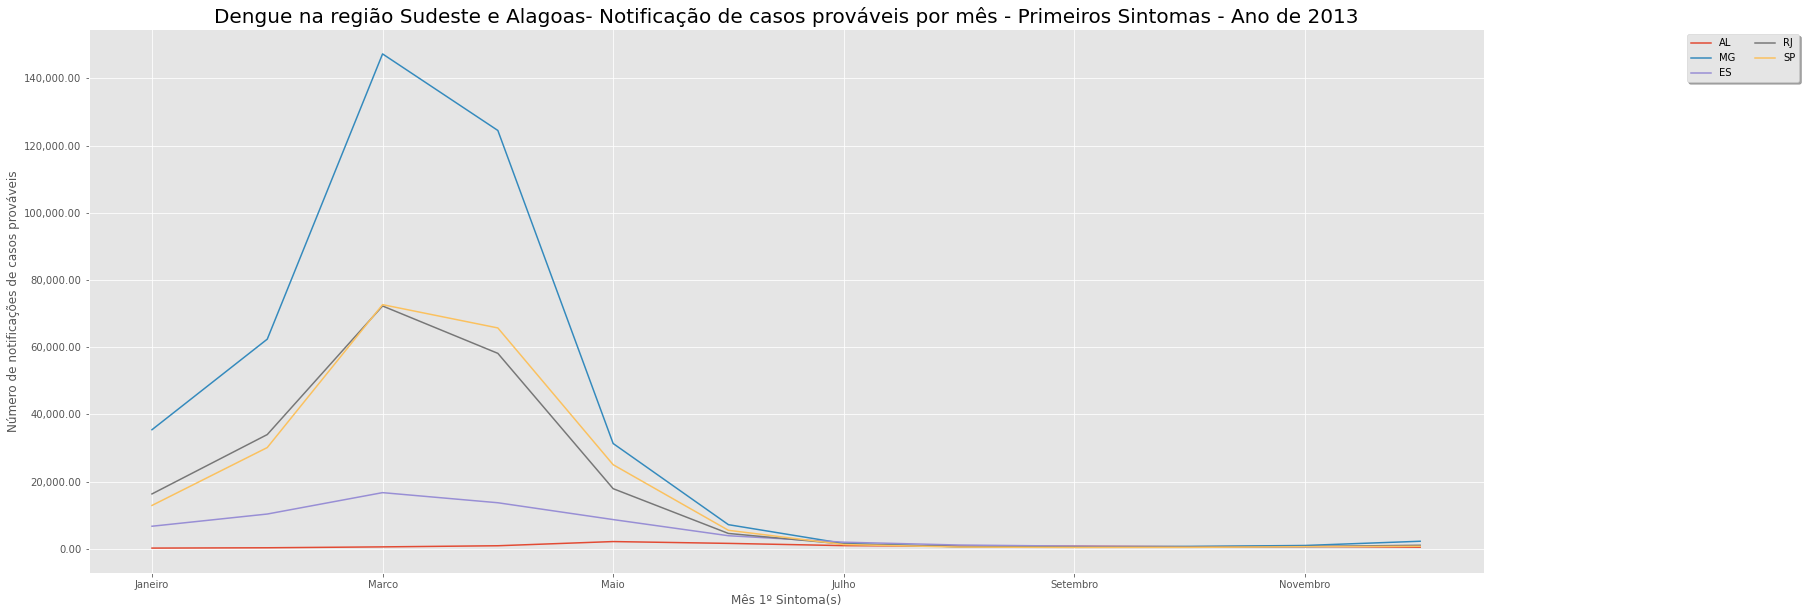

In [48]:
colors = plt.cm.jet(np.linspace(0,1,4))
ax = dados_dengue_sudeste_alagoas.iloc[: , :-1].plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("Número de notificações de casos prováveis")
plt.title(label = "Dengue na região Sudeste e Alagoas- Notificação de casos prováveis por mês - Primeiros Sintomas - Ano de 2013", fontsize=20)
plt.show()

A curva de gastos do Estado de Alagoas manteve-se sem picos ao longo do ano de 2013, bem como a curva de notificações de casos prováveis de dengue. <a href='https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2013/10/25/casos-de-dengue-quase-triplicam-em-2013.htm'>Notícias da época</a> informavam um quadro de triplicação de casos de dengue no país, com a região Sudeste concentrando 63,% do total de casos. A região Nordeste, onde fica Alagoas, era a terceira região com mais casos, totalizando 9,9% dos casos. Por estas notícias e pelos dados obtidos, faz sentido observar picos de gastos nos Estados da região Sudeste e certa estabilidade na região Nordeste, com destaque para Alagoas, o Estado comparado neste estudo.

# Aula 4

## Desafios

### 1 - Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Vamos pegar novamente o gráfico contendo gastos de seis estados.

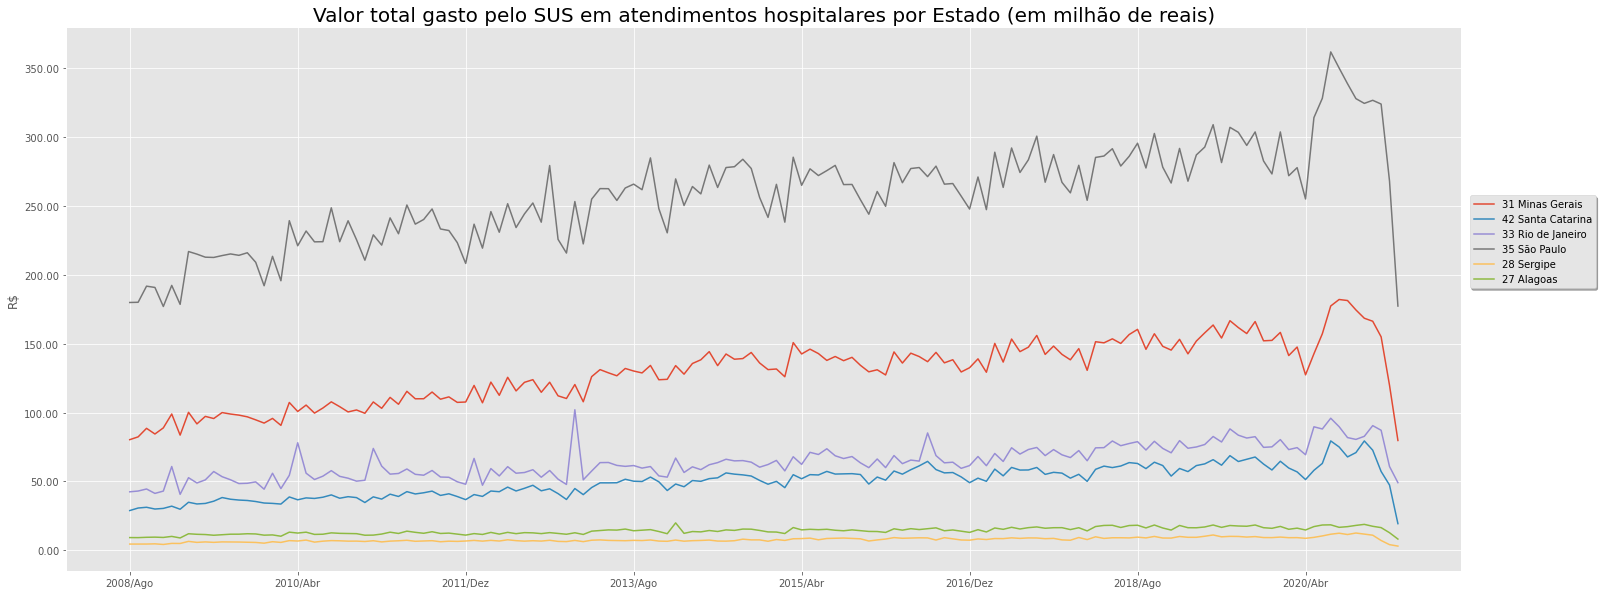

In [49]:
colors = plt.cm.jet(np.linspace(0,1,6))
colunas_de_interesse = dados_atendimentos_sem_total_plot.columns[6:]
dados_atendimentos_sem_total_plot_seis_estados = dados_atendimentos_sem_total_plot[colunas_de_interesse]
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot_seis_estados.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Existem dados desde o começo dos registros de dados. Vamos pegar conteúdo a partir de 2012, quando começou o pico de casos de dengue.

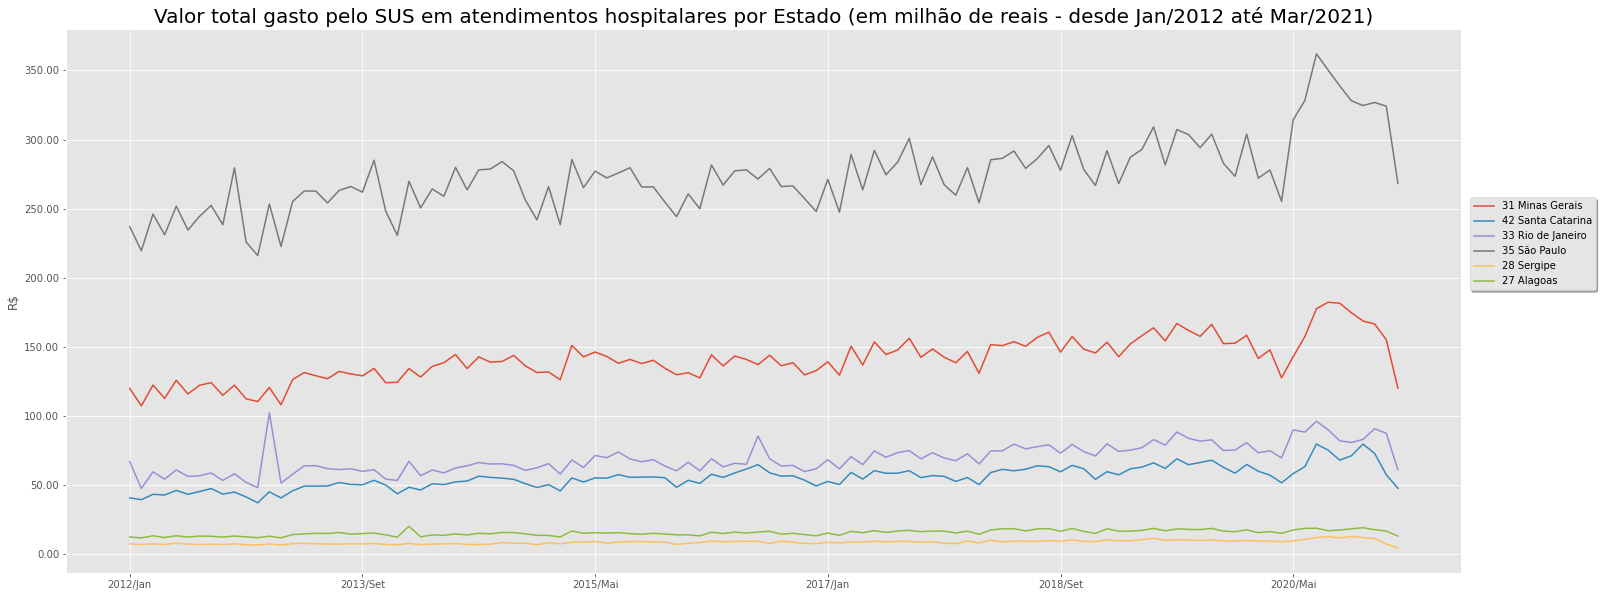

In [50]:
colors = plt.cm.jet(np.linspace(0,1,6))
colunas_de_interesse = dados_atendimentos_sem_total_plot.columns[47:158] # dados a partir de Janeiro de 2012 até Março de 2021
dados_atendimentos_sem_total_plot_seis_estados = dados_atendimentos_sem_total_plot[colunas_de_interesse]
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot_seis_estados.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais - desde Jan/2012 até Mar/2021)", fontsize=20)
plt.show()

Olhando o gráfico (olhando, não lendo), temos a impressão que o Estado de São Paulo gastou quase cinco vezes mais que o Estado de Santa Catarina (repare no espaço vertical entre as linhas). Porém, olhando o gráfico anterior temos a impressão que os gastos foram quase três vezes mais. O que está acontecendo?<br>
Na verdade, as janelas horizontal e vertical do gráfico estão modificadas de forma proposital a causar esta distorção. Podemos, por exemplo, plotar exatamente o mesmo gráfico anterior mas aumentando a janela do eixo Y para até 400 milhões.

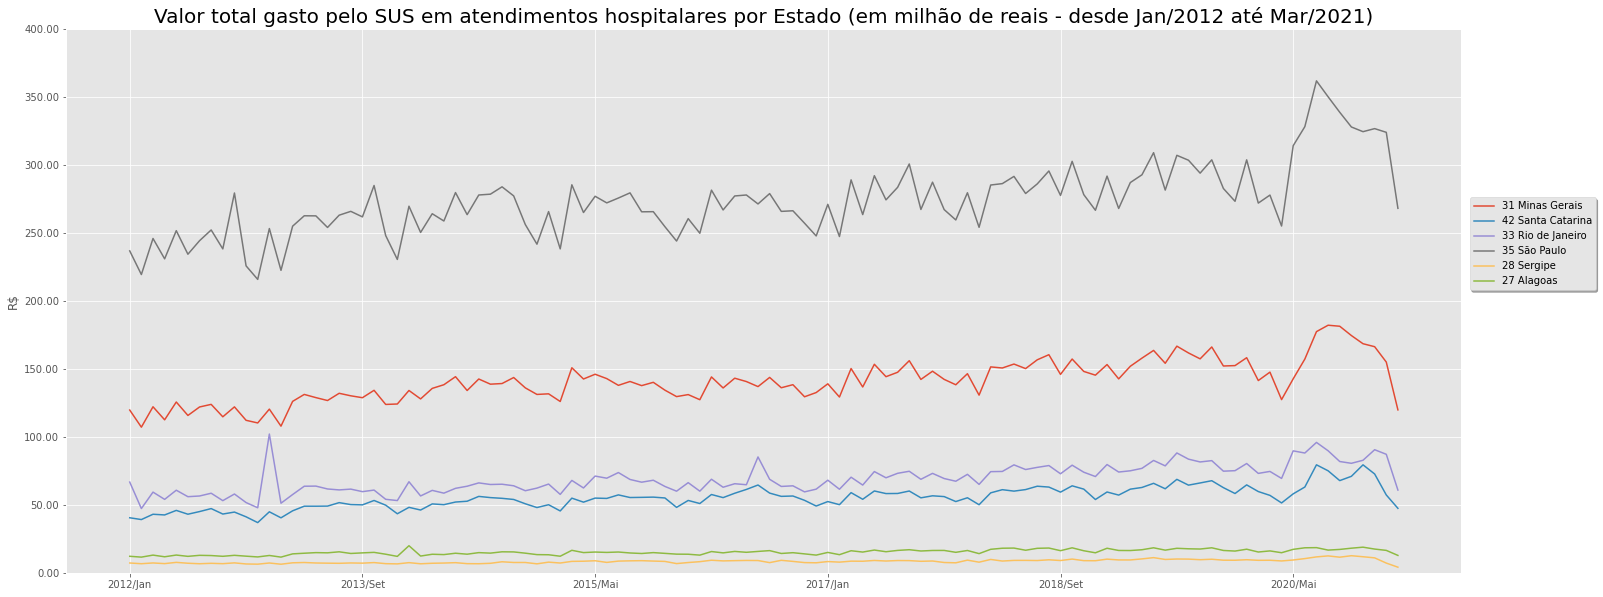

In [51]:
colors = plt.cm.jet(np.linspace(0,1,6))
colunas_de_interesse = dados_atendimentos_sem_total_plot.columns[47:158] # dados a partir de Janeiro de 2012 até Março de 2021
dados_atendimentos_sem_total_plot_seis_estados = dados_atendimentos_sem_total_plot[colunas_de_interesse]
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot_seis_estados.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais - desde Jan/2012 até Mar/2021)", fontsize=20)
plt.ylim(0,400) # Aumentando a janela do eixc Y
plt.show()

Note como ficou mais parecido com o primeiro gráfico que plotamos nesta aula!<br>
E dá pra bagunçar mais ainda! E se começarmos os valores do eixo Y a partir de 50 milhões?

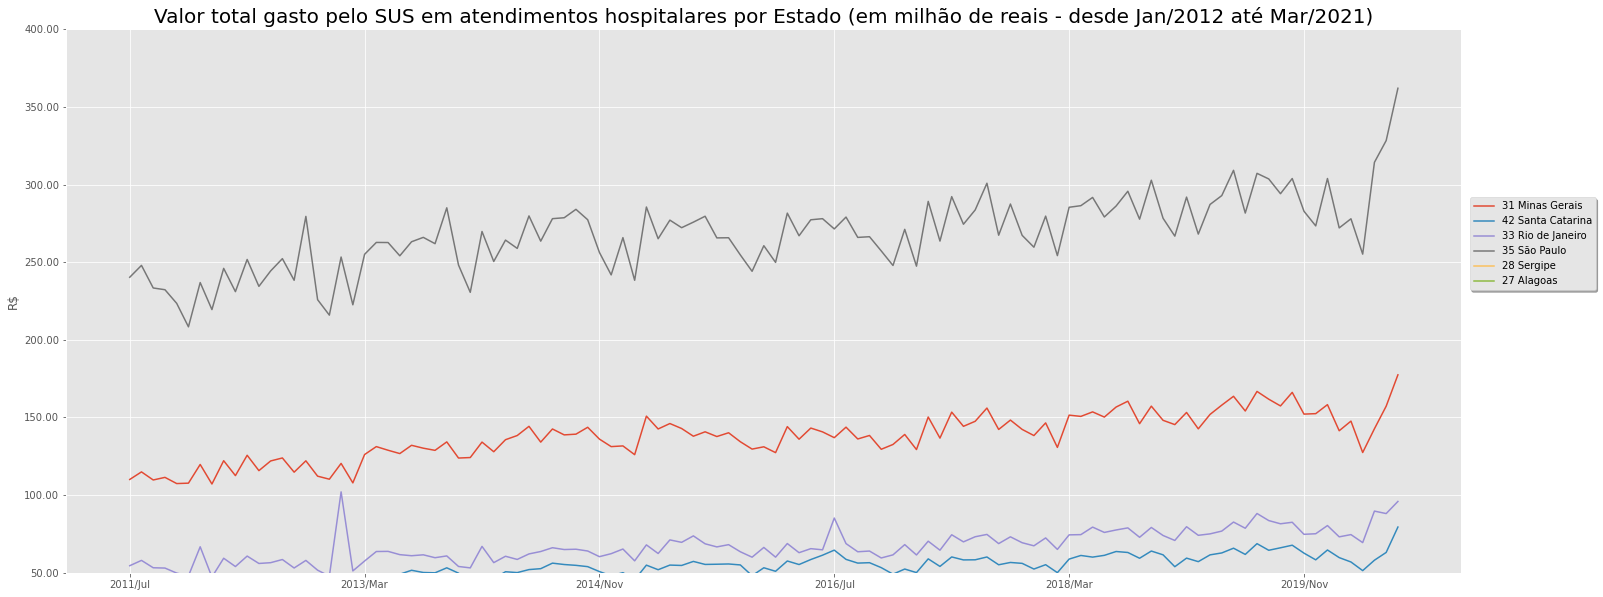

In [52]:
colors = plt.cm.jet(np.linspace(0,1,6))
colunas_de_interesse = dados_atendimentos_sem_total_plot.columns[41:151] # dados a partir de Janeiro de 2012 até Março de 2021
dados_atendimentos_sem_total_plot_seis_estados = dados_atendimentos_sem_total_plot[colunas_de_interesse]
colors = plt.cm.jet(np.linspace(0,1,27))
ax = dados_atendimentos_sem_total_plot_seis_estados.iloc[:, :-1].T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe', '27 Alagoas'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais - desde Jan/2012 até Mar/2021)", fontsize=20)
plt.ylim(50,400) # Aumentando a janela do eixo Y
plt.show()

Este exercício nos mostra que é possível escolher os parâmetros do gráfico para contar uma mentira, mesmo usando dados que contém a verdade.

### 2 - Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord

Estamos pesquisando e compartilhando artigos e textos que falam a respeito manipulação de gráficos.

# Aula 5

## Manipulação e interpretação de gráficos

Vamos reproduzir o mesmo gráfico de barras que fizemos na aula 1, porém com o dataframe atualizado e considerando o mês mais recente disponível, que é Março de 2021.

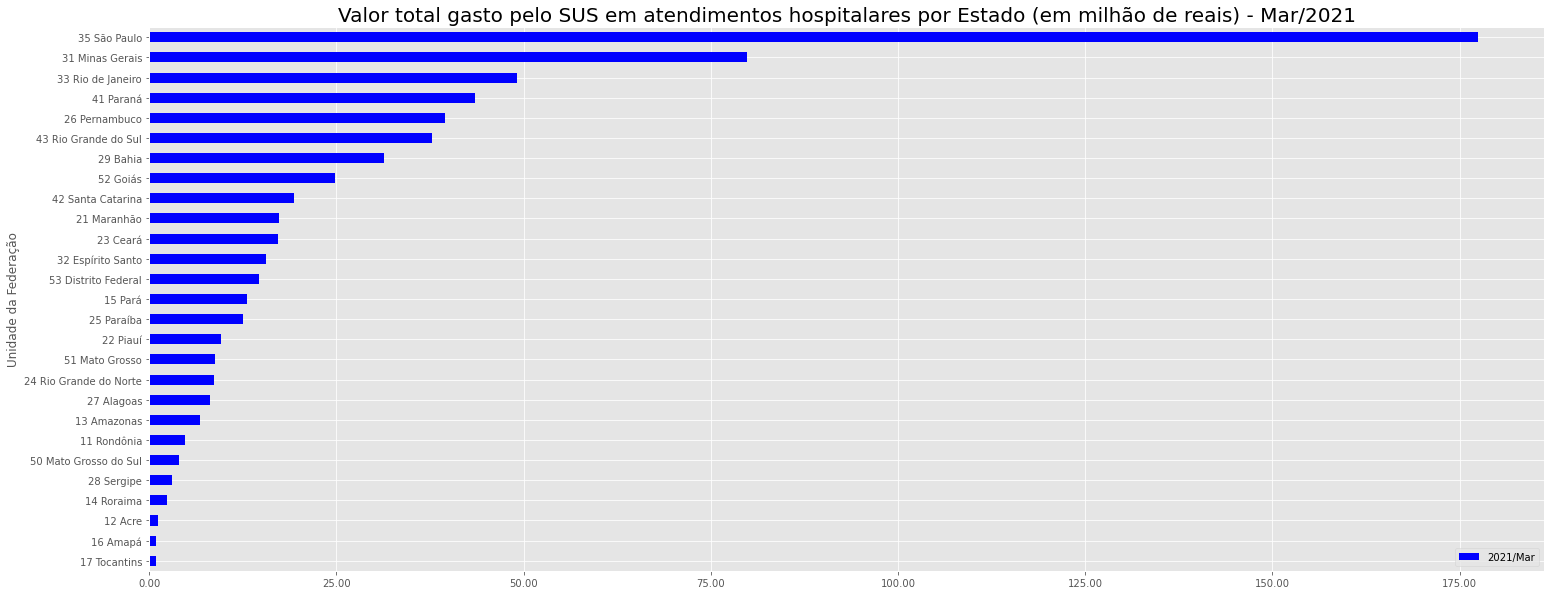

In [53]:
mes_mais_recente = dados_atendimentos_sem_total.columns[-1]
mes_mais_recente
dados_mais_recentes = dados_atendimentos_sem_total.sort_values(by=mes_mais_recente, ascending=False)
dados_mais_recentes = dados_mais_recentes.div(1000000)
ax = dados_mais_recentes.plot(y='2021/Mar', kind='barh', figsize=(25,10), color='blue')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais) - Mar/2021', fontsize=20)
plt.show()

## Desafios

### 1 - Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra

O gráfico acima já está com grid, mas colocaremos a instrução explicitamente.

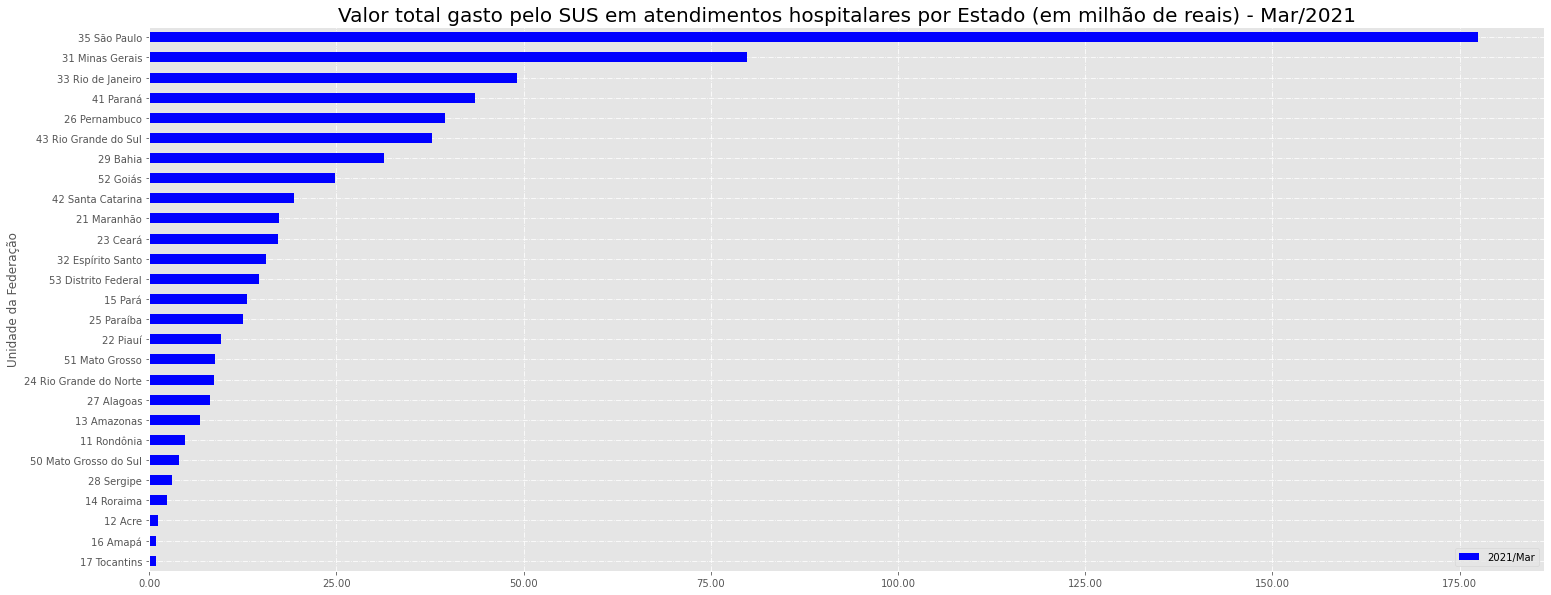

In [54]:
ax = dados_mais_recentes.plot(y='2021/Mar', kind='barh', figsize=(25,10), color='blue')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais) - Mar/2021', fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

### 2 - Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse

Primeiramente vamos fazer uma tabela em função do meu Estado, que é São Paulo.

In [55]:
dados_mais_recentes_SP = dados_mais_recentes / dados_mais_recentes.loc["35 São Paulo"]
dados_mais_recentes_SP

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
31 Minas Gerais,0.58,0.65,0.69,0.62,0.57,0.20,0.41,0.46,0.46,0.46,...,0.48,0.49,0.52,0.54,0.53,0.52,0.51,0.48,0.45,0.45
33 Rio de Janeiro,0.28,0.21,0.21,0.21,0.18,0.24,0.26,0.25,0.27,0.25,...,0.27,0.27,0.26,0.24,0.25,0.26,0.28,0.27,0.23,0.28
41 Paraná,0.33,0.32,0.32,0.32,0.38,0.06,0.28,0.33,0.33,0.32,...,0.35,0.34,0.36,0.36,0.39,0.41,0.37,0.33,0.31,0.25
26 Pernambuco,0.24,0.25,0.20,0.19,0.22,0.05,0.15,0.18,0.18,0.18,...,0.22,0.20,0.22,0.22,0.22,0.22,0.24,0.24,0.23,0.22
43 Rio Grande do Sul,0.63,0.72,0.59,0.47,0.39,0.05,0.27,0.31,0.31,0.30,...,0.29,0.30,0.32,0.32,0.35,0.36,0.36,0.32,0.31,0.21
29 Bahia,0.08,0.10,0.09,0.10,0.16,0.07,0.19,0.24,0.25,0.24,...,0.24,0.25,0.25,0.23,0.25,0.25,0.25,0.22,0.21,0.18
52 Goiás,0.11,0.09,0.08,0.08,0.12,0.07,0.10,0.12,0.12,0.11,...,0.12,0.13,0.14,0.14,0.14,0.12,0.12,0.11,0.12,0.14
42 Santa Catarina,0.42,0.25,0.24,0.22,0.19,0.05,0.14,0.16,0.16,0.16,...,0.19,0.22,0.21,0.20,0.22,0.24,0.22,0.18,0.18,0.11


E agora plotaremos o gráfico.

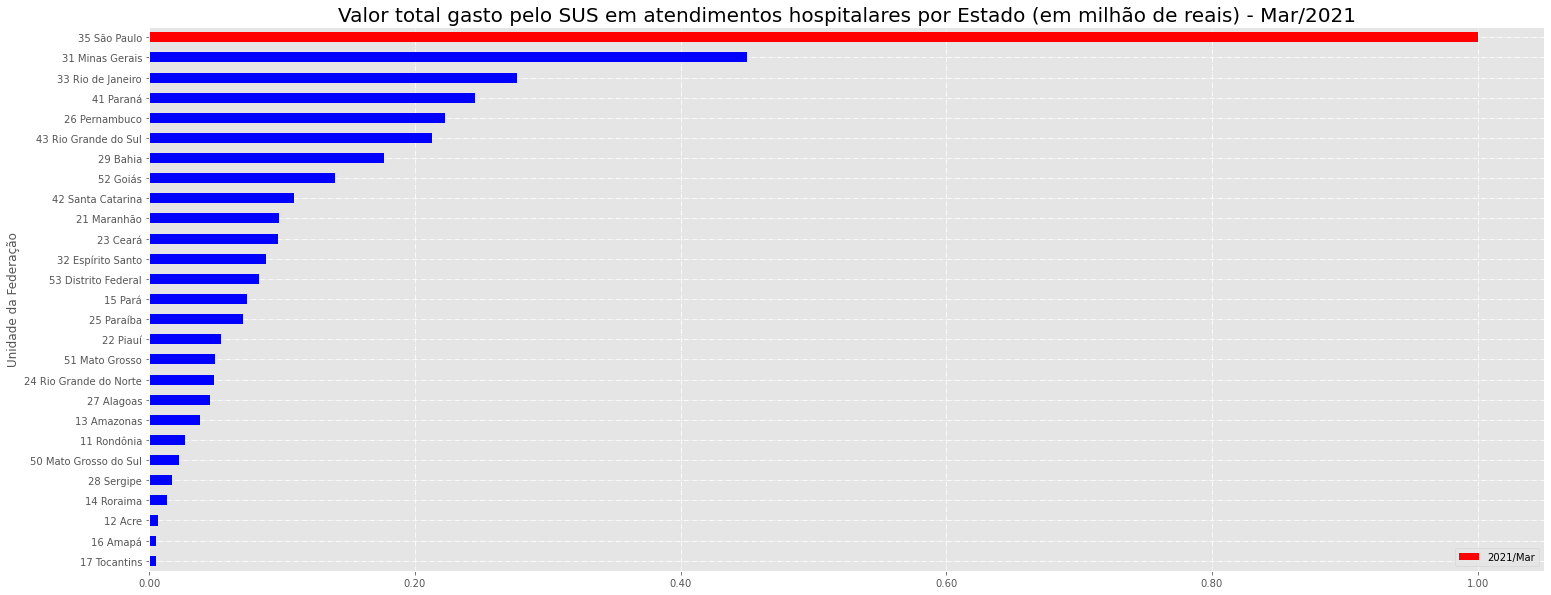

In [56]:
idx = dados_mais_recentes_SP.index.get_loc('35 São Paulo')
cores = ['blue'] * dados_mais_recentes_SP.shape[0]
cores[idx] = 'red'
ax = dados_mais_recentes_SP.plot(y='2021/Mar', kind='barh', figsize=(25,10), color=cores)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais) - Mar/2021', fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

Como o Estado de São Paulo é o que tem mais gastos, podemos usar outro estado para comparar. Por exemplo, Santa Catarina.

In [57]:
dados_mais_recentes_SC = dados_mais_recentes / dados_mais_recentes.loc["42 Santa Catarina"]
dados_mais_recentes_SC

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,2.40,4.06,4.09,4.62,5.19,19.57,7.09,6.21,6.13,6.08,...,5.20,4.56,4.67,5.00,4.62,4.09,4.49,5.66,5.65,9.16
31 Minas Gerais,1.40,2.62,2.81,2.87,2.94,3.89,2.88,2.88,2.84,2.80,...,2.49,2.23,2.43,2.67,2.46,2.12,2.29,2.71,2.53,4.12
33 Rio de Janeiro,0.68,0.84,0.84,0.96,0.92,4.74,1.81,1.56,1.63,1.55,...,1.40,1.21,1.20,1.21,1.13,1.04,1.25,1.52,1.28,2.54
41 Paraná,0.80,1.31,1.30,1.47,1.95,1.10,2.00,2.02,2.02,1.96,...,1.83,1.56,1.67,1.80,1.80,1.68,1.68,1.87,1.75,2.24
26 Pernambuco,0.58,1.00,0.83,0.88,1.15,0.97,1.07,1.12,1.10,1.11,...,1.13,0.93,1.01,1.09,1.02,0.90,1.07,1.34,1.31,2.04
43 Rio Grande do Sul,1.51,2.91,2.41,2.19,2.04,0.96,1.88,1.93,1.87,1.82,...,1.53,1.37,1.49,1.62,1.60,1.47,1.61,1.79,1.78,1.95
29 Bahia,0.19,0.41,0.39,0.44,0.81,1.39,1.37,1.50,1.54,1.48,...,1.25,1.15,1.15,1.15,1.17,1.03,1.14,1.23,1.17,1.62
52 Goiás,0.26,0.38,0.34,0.36,0.63,1.41,0.74,0.76,0.76,0.68,...,0.62,0.58,0.63,0.71,0.64,0.50,0.52,0.62,0.68,1.28
42 Santa Catarina,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


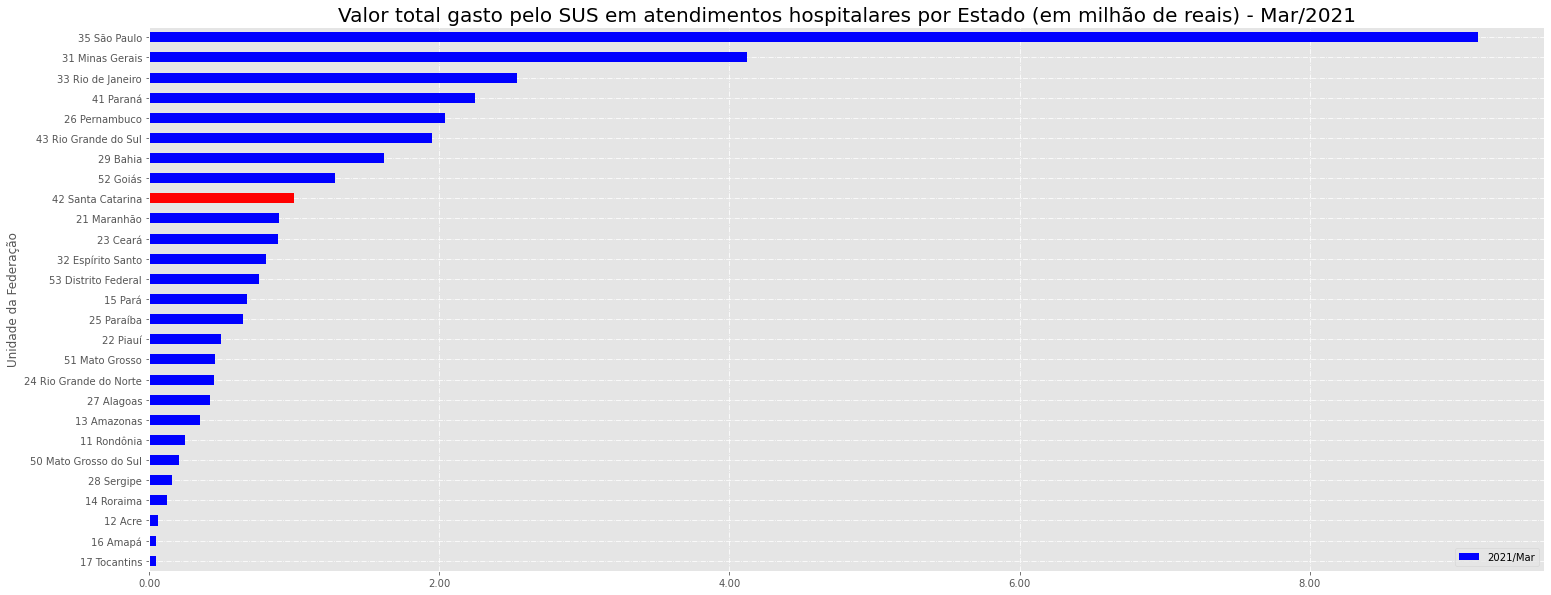

In [58]:
idx = dados_mais_recentes_SC.index.get_loc('42 Santa Catarina')
cores = ['blue'] * dados_mais_recentes_SC.shape[0]
cores[idx] = 'red'
ax = dados_mais_recentes_SC.plot(y='2021/Mar', kind='barh', figsize=(25,10), color=cores)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais) - Mar/2021', fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

### 3 - Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha

Existe na Wikipedia uma tabela chamada <a href='https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o
wikipedia_url_populacao_por_estado = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"
populacao = pd.read_html(wikipedia_url_populacao_por_estado, header=0, flavor="html5lib")[0]
populacao'>Lista de unidades federativas do Brasil por população</a>. Vamos usa-la para obter a população de cada Estado.<br>
Ela contém cinco colunas, das quais apenas "Unidade Federativa" e "População" servem para este desafio. Vamos recuperar as mesmas e transformar os dados da coluna 'População' para um tipo numérico.

In [59]:
wikipedia_url_populacao_por_estado = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"
populacao = pd.read_html(wikipedia_url_populacao_por_estado, header=0, flavor="html5lib")[0]
populacao = populacao[["Unidade federativa", "População"]]
populacao = populacao.set_index('Unidade federativa')
populacao['População'] = populacao['População'].str.replace(' ','')
populacao['População'] = pd.to_numeric(populacao['População'])
populacao

,População
Unidade federativa,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


E agora vamos adicionar a população ao dataset.

In [60]:
def get_populacao(estado):
    return populacao.loc[estado, 'População']

gastos_totais_por_populacao = dados_atendimentos_sem_total
gastos_totais_por_populacao['Total'] = gastos_totais_por_populacao.sum(axis=1)
gastos_totais_por_populacao = gastos_totais_por_populacao.sort_values('Total', ascending=False)

for index in gastos_totais_por_populacao.index:
    numero_habitantes = get_populacao(index[3:])
    gastos_totais_por_populacao.loc[index, 'População'] = numero_habitantes

gastos_totais_por_populacao['Gasto médio / habitante'] = gastos_totais_por_populacao['Total'] / gastos_totais_por_populacao['População']
gastos_totais_por_populacao = gastos_totais_por_populacao['Gasto médio / habitante']
gastos_totais_por_populacao = gastos_totais_por_populacao.sort_values(ascending=False)
gastos_totais_por_populacao

Unidade da Federação
41 Paraná                1274.77
43 Rio Grande do Sul     1117.42
42 Santa Catarina        1080.30
31 Minas Gerais           958.93
35 São Paulo              894.08
26 Pernambuco             892.30
53 Distrito Federal       848.50
32 Espírito Santo         838.04
50 Mato Grosso do Sul     827.41
24 Rio Grande do Norte    752.67
23 Ceará                  717.51
52 Goiás                  699.16
22 Piauí                  695.08
27 Alagoas                667.28
29 Bahia                  655.80
25 Paraíba                647.37
17 Tocantins              641.40
51 Mato Grosso            618.26
33 Rio de Janeiro         595.25
11 Rondônia               554.65
21 Maranhão               544.09
15 Pará                   541.41
28 Sergipe                524.34
14 Roraima                521.05
12 Acre                   503.14
13 Amazonas               455.65
16 Amapá                  359.54
Name: Gasto médio / habitante, dtype: float64

Com os dados em mãos, podemos plotar o gráfico.

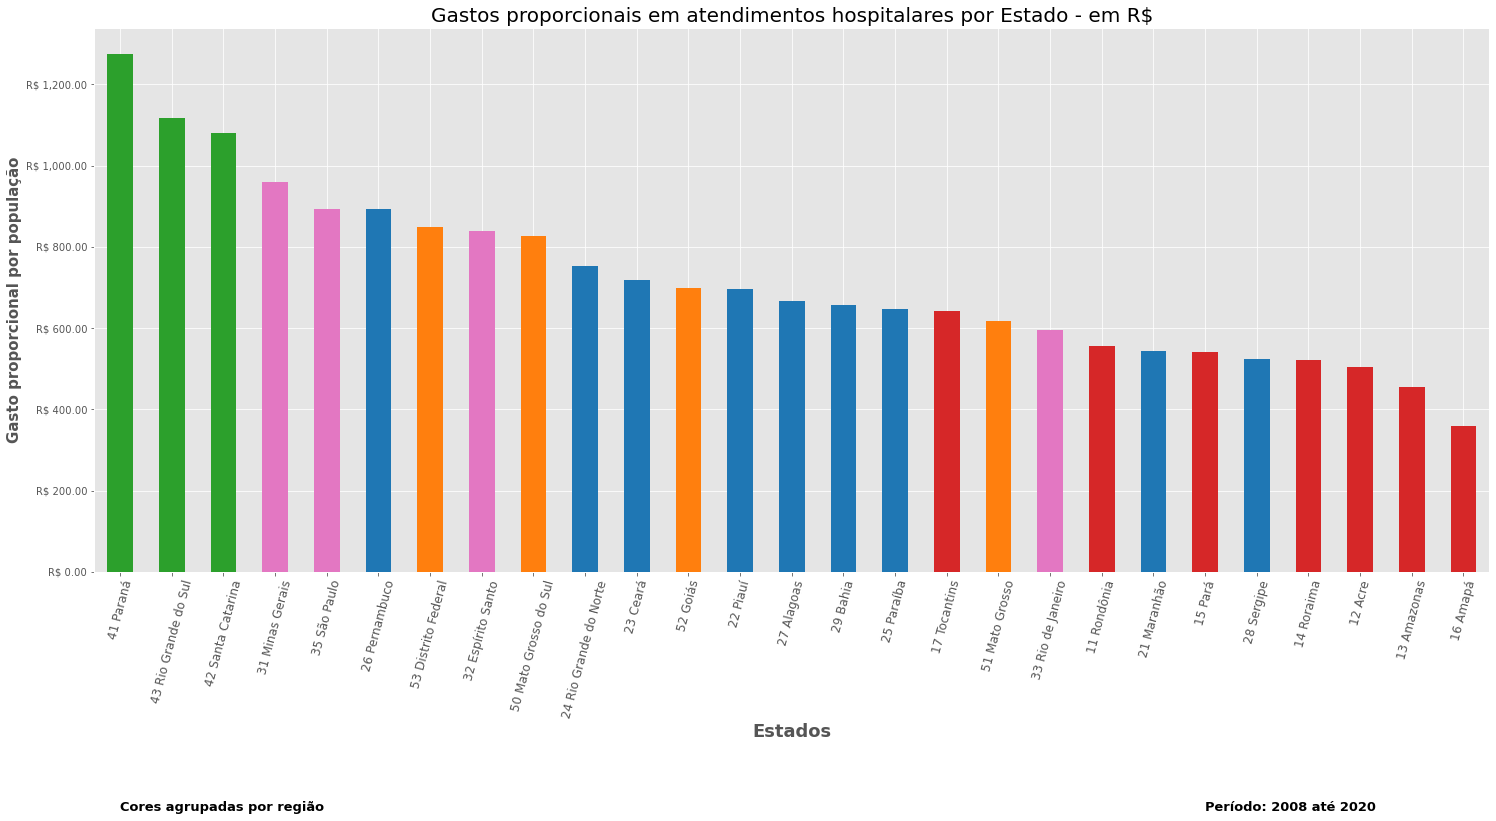

In [61]:
gastos_por_regiao = {
'1' : 'tab:red',
'2' : 'tab:blue',
'3' : 'tab:pink',
'4' : 'tab:green',
'5' : 'tab:orange'
}

cores = gastos_totais_por_populacao.index.str[0].map(gastos_por_regiao)
ax = gastos_totais_por_populacao.plot(y='Gasto médio / habitante', kind='bar', color=cores, figsize=(25,10), rot=75)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
ax.set_ylabel('Gasto proporcional por população', fontweight='bold', fontsize='15')
ax.set_xticklabels(gastos_totais_por_populacao.index, size='large')
ax.set_xlabel('Estados', fontweight='bold', fontsize='18')
plt.title(label='Gastos proporcionais em atendimentos hospitalares por Estado - em R$', fontsize=20)
plt.text(21,-580,'Período: 2008 até 2020', verticalalignment='center', fontsize=13, fontweight='bold',color='black')
plt.text(0,-580,'Cores agrupadas por região',verticalalignment='center',fontsize=13,fontweight='bold',color='black')
plt.show()

### 4 - Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord

Quando comparamos os gastos de saúde entre São Paulo e Santa Catarina, em valores absolutos, vemos que São Paulo gasta mais de cinco vezes. Entretanto, o gasto <i>per capita</i> do Estado do Sul do país é maior. <br> 
Historicamente o país tem se mostrado problemático quando o assunto é saúde pública. O Brasil, apesar de ter - por força da Constituição - um sistema público e universal de saúde, apresenta mais gastos privados na saúde que gastos públicos. <br>
Em 2014, por exemplo, <a href='https://www.scielosp.org/article/sdeb/2018.v42nspe2/37-47/pt/'>um estudo</a> mostrou que países da OCDE com sistema universal de saúde similar ao nosso, gastaram em média % do PIB nessa área, enquanto o Brasil gastou apenas 3,9%, considerando participação de Estados, Municípios e Governo Federal. <br>
Um ponto de grande agravamento foi a implementação de políticas de austeridade fiscal, como a <a href='https://www.in.gov.br/materia/-/asset_publisher/Kujrw0TZC2Mb/content/id/21295527/do1-2016-12-16-emenda-constitucional-n-95-21295459'>EF (Emenda Constitucional) 95/16</a>. A mesma estipulou um teto de gastos para o Governo, bem como congelamento de gastos com saúde em valores reais pelos próximos 20 anos. Com tal medida, o valor do PIB do Governo Federal destinado à saúde reduziria ao longo do tempo conforme a economia cresce. O impacto de médio e longo prazo é que neste mesmo período a população de idosos (mais vulneráveis e mais dependentes de serviços de saúde) <a href='http://www.analisepoliticaemsaude.org/oaps/boletim/edicao/8/'>dobrará</a>! <br>


In [182]:
dados_ocde = pd.read_csv('DP_LIVE_30052021041131100.csv', encoding='ISO-8859-1', engine='python')
dados_ocde.rename(columns={dados_ocde.columns[0]: 'LOCATION'}, inplace=True)
paises_sus = ['CAN', 'SWE', 'BRA', 'ESP','PRT']
dados_ocde = dados_ocde.loc[dados_ocde['LOCATION'].isin(paises_sus)]
dados_ocde = dados_ocde.loc[dados_ocde['SUBJECT'] == 'COMPULSORY']
dados_ocde = dados_ocde.loc[dados_ocde['TIME'].between(2000,2017)]
dados_ocde = dados_ocde.loc[dados_ocde['MEASURE'] == 'PC_GDP']
dados_ocde = dados_ocde.drop('SUBJECT', axis=1)
dados_ocde = dados_ocde.drop('INDICATOR', axis=1)
dados_ocde = dados_ocde.drop('MEASURE', axis=1)
dados_ocde = dados_ocde.drop('FREQUENCY', axis=1)
dados_ocde = dados_ocde.drop('Flag Codes', axis=1)

def preenche_paises(pais):
    switcher = {
        'CAN': 'Canadá',
        'ESP': 'Espanha',
        'BRA': 'Brasil',
        'SWE': 'Suécia',
        'PRT': 'Portugal'
    }
    return switcher.get(pais, 'País não encontrado!')

dados_ocde = pd.pivot_table(dados_ocde, values='Value', index=['TIME'], columns=['LOCATION'])
dados_ocde.head(20)
    

#dados_ocde_brasil = dados_ocde.loc[dados_ocde['LOCATION'] == 'BRA']
#dados_ocde_brasil.plot()
#dados_ocde_brasil = dados_ocde_brasil.set_index('TIME')
#dados_ocde_brasil.T
#dados_ocde_brasil.plot()


#ax = dados_ocde_brasil.plot(figsize=(25,10), label='Brasil')
#plt.show()

LOCATION,BRA,CAN,ESP,PRT,SWE
TIME,,,,,
2000,3.47,5.77,4.85,5.90,6.30
2001,3.51,6.01,4.81,5.95,6.53
2002,3.69,6.13,4.83,6.21,6.82
2003,3.51,6.30,5.38,6.32,6.96
2004,3.47,6.33,5.46,6.61,6.77
2005,3.35,6.31,5.53,6.73,6.75
2006,3.54,6.49,5.64,6.32,6.68
2007,3.48,6.57,5.72,6.23,6.64
2008,3.50,6.70,6.14,6.39,6.80
